## Example 1: Spin-Bath model
### Introduction

The HEOM method solves the dynamics and steady state of a system and its environment, the latter of which is encoded in a set of auxiliary density matrices.

In this example we show the evolution of a single two-level system in contact with a single Bosonic environment.  The properties of the system are encoded in Hamiltonian, and a coupling operator which describes how it is coupled to the environment.

The Bosonic environment is implicitly assumed to obey a particular Hamiltonian (see paper), the parameters of which are encoded in the spectral density, and subsequently the free-bath correlation functions.

In the example below we show how to model the overdamped Drude-Lorentz Spectral Density, commonly used with the HEOM. We show how to do this the Matsubara, Pade and fitting decompositions, and compare their convergence.  

### Drude-Lorentz (overdamped) spectral density
The Drude-Lorentz spectral density is:

$$J_D(\omega)= \frac{2\omega\lambda\gamma}{{\gamma}^2 + \omega^2}$$

where $\lambda$ scales the coupling strength, and $\gamma$ is the cut-off frequency.  We use the convention,
\begin{equation*}
C(t) = \int_0^{\infty} d\omega \frac{J_D(\omega)}{\pi}[\coth(\beta\omega) \cos(\omega \tau) - i \sin(\omega \tau)]
\end{equation*}

With the HEOM we must use an exponential decomposition:

\begin{equation*}
C(t)=\sum_{k=0}^{k=\infty} c_k e^{-\nu_k t}
\end{equation*}

As an example, the Matsubara decomposition of the Drude-Lorentz spectral density is given by:

\begin{equation*}
    \nu_k = \begin{cases}
               \gamma               & k = 0\\
               {2 \pi k} / {\beta }  & k \geq 1\\
           \end{cases}
\end{equation*}

\begin{equation*}
    c_k = \begin{cases}
               \lambda \gamma (\cot(\beta \gamma / 2) - i)             & k = 0\\
               4 \lambda \gamma \nu_k / \{(nu_k^2 - \gamma^2)\beta \}    & k \geq 1\\
           \end{cases}
\end{equation*}

Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.

###  Brownian motion (underdamped) spectral density
The underdamped spectral density is:

$$J_U = \frac{\alpha^2 \Gamma \omega}{(\omega_c^2 - \omega^2)^2 + \Gamma^2 \omega^2)}.$$

Here $\alpha$  scales the coupling strength, $\Gamma$ is the cut-off frequency, and $\omega_c$ defines a resonance frequency.  With the HEOM we must use an exponential decomposition:

The Matsubara decomposition of this spectral density is, in real and imaginary parts:



\begin{equation*}
    c_k^R = \begin{cases}
               \alpha^2 \coth(\beta( \Omega + i\Gamma/2)/2)/4\Omega & k = 0\\
               \alpha^2 \coth(\beta( \Omega - i\Gamma/2)/2)/4\Omega & k = 0\\
              -2\alpha^2\Gamma/\beta \frac{\epsilon_k }{((\Omega + i\Gamma/2)^2 + \epsilon_k^2)(\Omega - i\Gamma/2)^2 + \epsilon_k^2)}      & k \geq 1\\
           \end{cases}
\end{equation*}

\begin{equation*}
    \nu_k^R = \begin{cases}
               -i\Omega  + \Gamma/2, i\Omega  +\Gamma/2,             & k = 0\\
               {2 \pi k} / {\beta }  & k \geq 1\\
           \end{cases}
\end{equation*}




\begin{equation*}
    c_k^I = \begin{cases}
               i\alpha^2 /4\Omega & k = 0\\
                -i\alpha^2 /4\Omega & k = 0\\
           \end{cases}
\end{equation*}

\begin{equation*}
    \nu_k^I = \begin{cases}
               i\Omega  + \Gamma/2, -i\Omega  + \Gamma/2,             & k = 0\\
           \end{cases}
\end{equation*}

Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.



In [1]:
%pylab inline
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from heom_fmotd import BosonicHEOMSolver
from heom_fmotd_NL import BosonicHEOMSolver as BosonicHEOMSolverPY

In [4]:

def cot(x):
    return 1./np.tan(x)


In [5]:
1/(2 * pi * 5)

0.03183098861837907

In [5]:
# Defining the system Hamiltonian
eps = 2 * pi * 5     # Energy of the 2-level system.
Del = 2 * pi * 10.0    # Tunnelling term
Hsys = 0.5 * eps * sigmaz() + 0.5 * Del * sigmax()

In [6]:
Hsys = 2*pi*Qobj([[130, 1.2608,0.1612,0.0474],
                    [1.2608, 129, 1.3190, .1612],
                    [0.1612, 1.3190,123,1.2608 ],
                    [0.0474, 0.1612,1.2608, 122]])

In [6]:
Hsys = Qobj([[130, 1.2608,0.1612,0.0474],
                    [1.2608, 129, 1.3190, .1612],
                    [0.1612, 1.3190,123,1.2608 ],
                    [0.0474, 0.1612,1.2608, 122]])

In [7]:
# Initial state of the system.
rho0 = basis(4,0) * basis(4,0).dag()  

In [8]:
from mpmath import mp
from mpmath import zeta
from mpmath import gamma

mp.dps = 15; mp.pretty = True

In [9]:
#gamma = 2*pi*45*1000
#Temperature= 1000*(300./1.4387773538277202)*((2*pi*6.3)/126)*100
#tlist = np.linspace(0, 0.012, 12000)


In [10]:
T = 10*(300./1.4387773538277202)*((2*pi*6.3)/126)*100
print(T)
tlist = np.linspace(0, 0.04, 5000)

print(T/(2*pi*10))

65505.46500954938
1042.5518555802973


In [12]:
#lets check this again.

# 5x 10 -5 K

# kB T = Hbar Om

#kB/hbar =1.309e11
#TNMR = 5e-5 #kelvin
TNMR = 5e-4 #kelvin
T=TNMR*1.309e11/1000
print(T)

65450.0


In [9]:
tlist = np.linspace(0, 0.04, 5000)
T = 300000 * 0.6949

Text(0, 0.5, 'C')

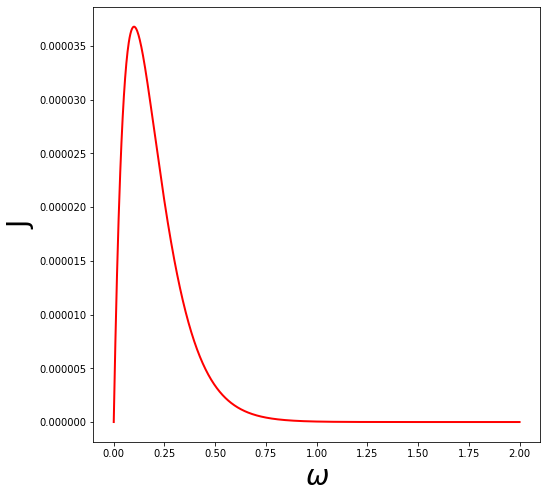

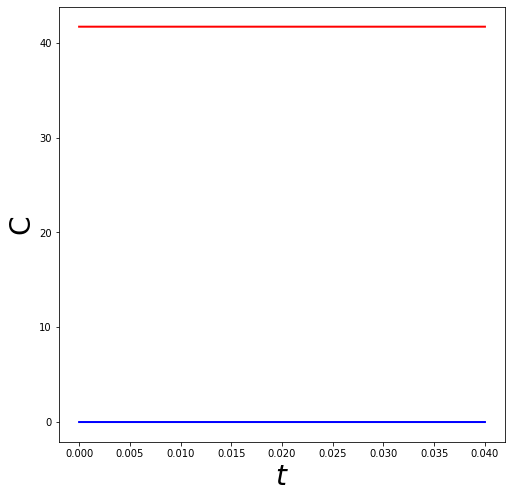

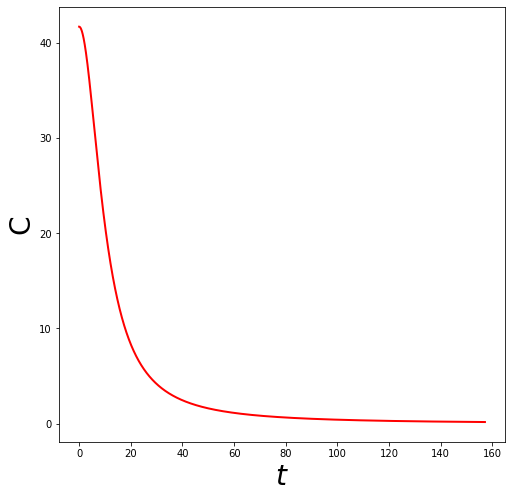

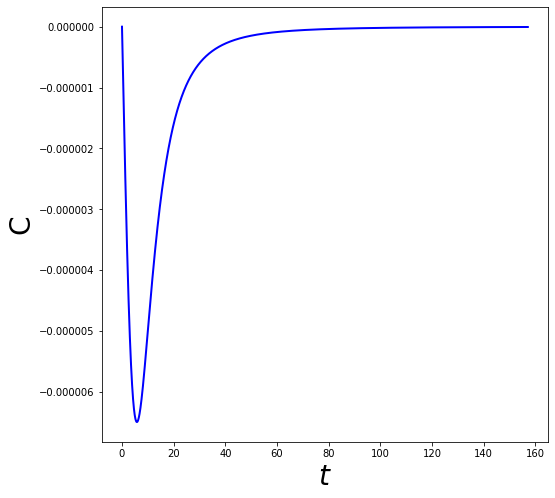

In [10]:
alpha = 2 * pi * 1.75
alpha = 1.75/1000
alpha = 1e-3
#alpha = 2 * pi * 1e-3
#T = 2 * pi * 30
#T = 0.0001
wc = 2 * pi * 30
wc = 0.1
beta  = 1/T 
s = 1

tlist3 = linspace(0,25*2*pi,10000)
#tlist3 = linspace(0,50,10000)

#note: the argumetns to zeta should be in as high precision as possible, might need some adjustment
# see http://mpmath.org/doc/current/basics.html#providing-correct-input
ct = [complex(alpha * wc**(1-s) * beta**(-(s+1)) * (zeta(s+1,(1+beta*wc-1.0j*wc*t)/(beta*wc)) + 
            zeta(s+1,(1+1.0j*wc*t)/(beta*wc)))) for t in tlist]


#also check long timescales
ctlong = [complex(alpha * wc**(1-s) * beta**(-(s+1)) * (zeta(s+1,(1+beta*wc-1.0j*wc*t)/(beta*wc)) + 
            zeta(s+1,(1+1.0j*wc*t)/(beta*wc)))) for t in tlist3]


corrRana =  real(ctlong)
corrIana = imag(ctlong)

wlist = np.linspace(0,2 , 1000)
pref = 1.



def JDL(energy):
    #underdamped brownian oscillator
    lam = alpha
    gamma = wc
    
    return 2 * lam * gamma * (energy)/(((energy**2) + (gamma**2)))



J = [w**s * alpha * (1./(wc**(s-1))) * e**(-w/wc)  for w in wlist]
J = [w * alpha * e**(-w/wc)  for w in wlist]

JDL2 = [JDL(w)  for w in wlist]
# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(wlist, J, 'r', linewidth=2)
#axes.plot(wlist, JDL2, 'b', linewidth=2)
axes.set_xlabel(r'$\omega$', fontsize=28)
axes.set_ylabel(r'J', fontsize=28)

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(tlist, real(ct), 'r', linewidth=2)
axes.plot(tlist, imag(ct), 'b', linewidth=2)
axes.set_xlabel(r'$t$', fontsize=28)
axes.set_ylabel(r'C', fontsize=28)

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(tlist3, real(ctlong), 'r', linewidth=2)


#axes.axvline(x=1/Del)

axes.set_xlabel(r'$t$', fontsize=28)
axes.set_ylabel(r'C', fontsize=28)
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))






axes.plot(tlist3, imag(ctlong), 'b', linewidth=2)

axes.set_xlabel(r'$t$', fontsize=28)
axes.set_ylabel(r'C', fontsize=28)


In [11]:
def Jw(w):
    Jt  = w**s * alpha * (1./(wc**(s-1))) * e**(-w/wc) 
    return Jt

from spectra import bath_correlation

# plt.plot(tlist, y)
# plt.show()

print("Computing bath correlation function.")

corrRnum, corrInum = bath_correlation(tlist3, Jw, 1/T, wstart=0, wend=100)
print("Got bath correlation function.")

Computing bath correlation function.


/home/neill/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


Got bath correlation function.


Text(0, 0.5, 'Im[C(t)]')

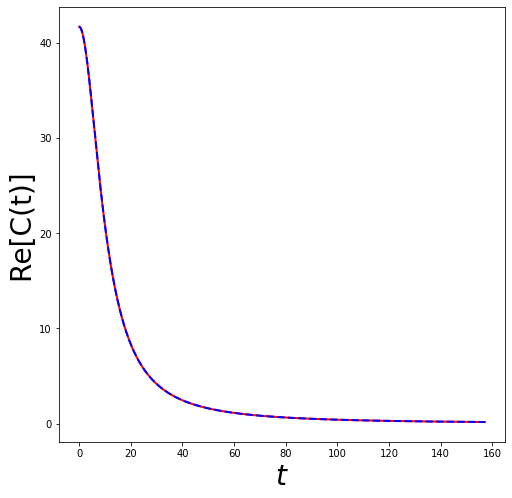

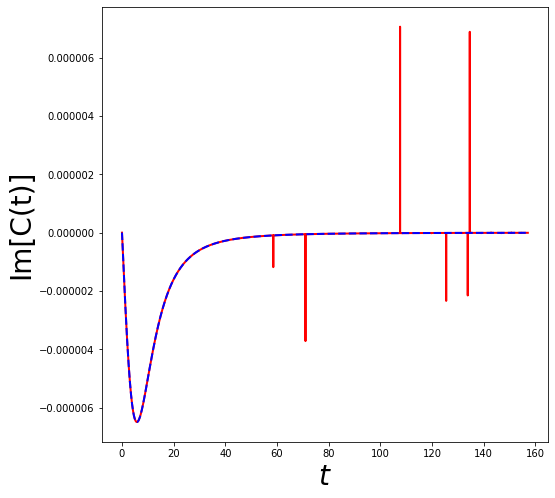

In [12]:
#corrRana =  real(ct)
#corrIana = imag(ct)
corrRana =  real(ctlong)
corrIana = imag(ctlong)
# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(tlist3, pi*corrRnum, 'r', linewidth=2)
axes.plot(tlist3, corrRana, 'b--', linewidth=2)
axes.set_xlabel(r'$t$', fontsize=28)
axes.set_ylabel(r'Re[C(t)]', fontsize=28)


fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(tlist3, pi*corrInum, 'r', linewidth=2)
axes.plot(tlist3, corrIana, 'b--', linewidth=2)
axes.set_xlabel(r'$t$', fontsize=28)
axes.set_ylabel(r'Im[C(t)]', fontsize=28)


In [52]:
tt = tlist[1]
print(tt)
print(2*alpha*gamma(s+1)*wc**(s+1)/(1+1.0j*wc*tt)**(-(s+1)))

0.002506265664160401
(606974.181013597 + 738258.374152439j)


## Ishizaki-Tanimura Terminator

The value of $Re[C(t=0)]$ diverges. We can treat that component as a delta-function distribution, and include it as Lindblad correction. This is sometimes known as the Ishizaki-Tanimura Terminator.

In more detail, given

\begin{equation*}
C(t)=\sum_{k=0}^{\infty} c_k e^{-\nu_k t}
\end{equation*}
since $\nu_k=\frac{2 \pi k}{\beta }$, if $1/\nu_k$ is much much smaller than other important time-scales, we can approximate,  $ e^{-\nu_k t} \approx \delta(t)/\nu_k$, and $C(t)=\sum_{k=N_k}^{\infty} \frac{c_k}{\nu_k} \delta(t)$

It is convenient to calculate the whole sum $C(t)=\sum_{k=0}^{\infty} \frac{c_k}{\nu_k} =  2 \lambda / (\beta \gamma) - i\lambda $, and subtract off the contribution from the finite number of Matsubara terms that are kept in the hierarchy, and treat the residual as a Lindblad.

### Next we do fitting of correlation, and compare to Mats and Pade


In [100]:
print(arange(2*2,3*2))

[4 5]


In [49]:
corrIana[0]

0.0

1
2


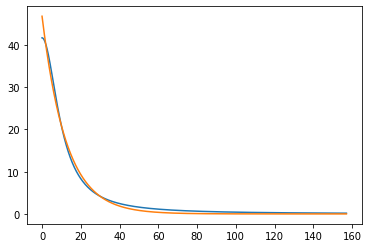

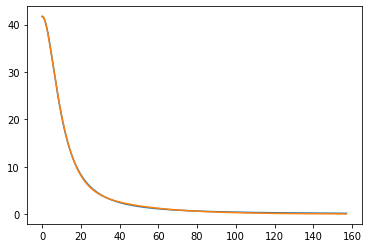

1
2


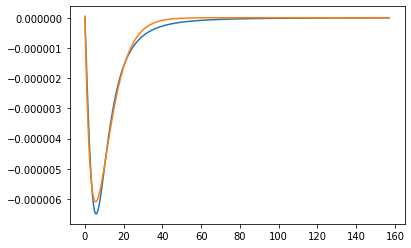

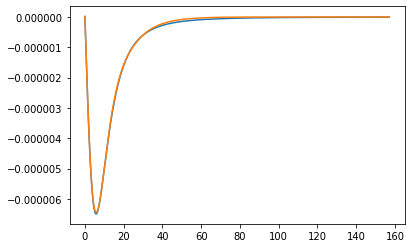

In [14]:
#tlist2 = tlist
tlist2 = tlist3  #use longer timescale data

from scipy.optimize import curve_fit

#seperate functions for plotting later:



def fit_func_nocost(x, a, b, c, d, N):
    tot = 0
    for i in range(N):
        # print(i)
        tot += a[i]*np.exp(b[i]*x)*np.cos(c[i]*x + d[i])
    cost = 0.
    
    return tot   

def wrapper_fit_func_nocost(x, N, *args):
    a, b, c, d = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N]), list(args[0][3*N:4*N])
    # print("debug")
    return fit_func_nocost(x, a, b, c, d, N)


# function that evaluates values with fitted params at
# given inputs
def checker(tlist, vals, N):
    y = []
    for i in tlist:
        # print(i)
        
        y.append(wrapper_fit_func_nocost(i, N, vals))
    return y


#######
#Real part 

def wrapper_fit_func(x, N, *args):
    a, b, c, d = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N]), list(args[0][3*N:4*N])
    # print("debug")
    return fit_func(x, a, b, c, d, N)



def fit_func(x, a, b, c, d, N):
    tot = 0
    for i in range(N):
        # print(i)
        tot += a[i]*np.exp(b[i]*x)*np.cos(c[i]*x + d[i])
    cost = 0.
    for i in range(N):
        #print(i)
        cost += ((corrRana[0]-a[i]*np.cos(d[i])))
        
        
    tot+=0.0*cost
    
    return tot      

def fitterR(ans, tlist, k):
    # the actual computing of fit
    popt = []
    pcov = [] 
    # tries to fit for k exponents
    for i in range(k):
        #params_0 = [0]*(2*(i+1))
        params_0 = [0.]*(4*(i+1))
        upper_a = 10*abs(max(ans, key = abs))
        #sets initial guess
        guess = []
        #aguess = [ans[0]]*(i+1)#[max(ans)]*(i+1)
        aguess = [abs(max(ans, key = abs))]*(i+1)
        bguess = [-1]*(i+1)
        cguess = [1]*(i+1)
        dguess = [0]*(i+1)
        guess.extend(aguess)
        guess.extend(bguess)
        guess.extend(cguess) #c 
        guess.extend(dguess) #d
        # sets bounds
        # a's = anything , b's negative
        # sets lower bound
        b_lower = []
        alower = [-upper_a]*(i+1)
        blower = [-np.inf]*(i+1)
        clower = [1e-5]*(i+1)
        dlower = [0]*(i+1)
        b_lower.extend(alower)
        b_lower.extend(blower)
        b_lower.extend(clower)
        b_lower.extend(dlower)
        # sets higher bound
        b_higher = []
        ahigher = [upper_a]*(i+1)
        #bhigher = [np.inf]*(i+1)
        bhigher = [0]*(i+1)
        chigher = [np.inf]*(i+1)
        dhigher = [2*pi]*(i+1)
        b_higher.extend(ahigher)
        b_higher.extend(bhigher)
        b_higher.extend(chigher)
        b_higher.extend(dhigher)
        param_bounds = (b_lower, b_higher)
        
        p1, p2 = curve_fit(lambda x, *params_0: wrapper_fit_func(x, i+1, \
            params_0), tlist, ans, p0=guess, sigma=[0.01 for t in tlist], bounds = param_bounds, maxfev = 100000000)
        popt.append(p1)
        pcov.append(p2)
        print(i+1)
    return popt
# print(popt)



k = 2
popt1 = fitterR(corrRana, tlist2, k)
for i in range(k):
    y = checker(tlist2, popt1[i],i+1)
    plt.plot(tlist2, corrRana, tlist2, y)
    
    plt.show()
    


#y = checker(tlist3, popt1[k-1],k)
#plt.plot(tlist3, real(ctlong), tlist3, y)

#plt.show()


#######
#Imag part 



def fit_func2(x, a, b, c, d, N):
    tot = 0
    for i in range(N):
        # print(i)
        tot += a[i]*np.exp(b[i]*x)*np.cos(c[i]*x + d[i])
    cost = 0.
    for i in range(N):
        # print(i)
        cost += (corrIana[0]-a[i]*np.cos(d[i]))
        
        
    tot+=1.1*cost
    
    return tot 
# actual fitting function


def wrapper_fit_func2(x, N, *args):
    a, b, c, d = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N]), list(args[0][3*N:4*N])
    # print("debug")
    return fit_func2(x, a, b, c, d, N)

  
    
def fitterI(ans, tlist, k):
    # the actual computing of fit
    popt = []
    pcov = [] 
    # tries to fit for k exponents
    for i in range(k):
        #params_0 = [0]*(2*(i+1))
        params_0 = [0.]*(4*(i+1))
        upper_a = abs(max(ans, key = abs))*100
        #sets initial guess
        guess = []
        #aguess = [ans[0]]*(i+1)#[max(ans)]*(i+1)
        aguess = [-3*abs(max(ans, key = abs))]*(i+1)
        bguess = [-.16]*(i+1)
        cguess = [.05]*(i+1)
        dguess = [0]*(i+1)
        guess.extend(aguess)
        guess.extend(bguess)
        guess.extend(cguess) #c 
        guess.extend(dguess) #d
        # sets bounds
        # a's = anything , b's negative
        # sets lower bound
        b_lower = []
        alower = [-upper_a]*(i+1)
        blower = [-1000]*(i+1)
        clower = [0]*(i+1)
        dlower = [0]*(i+1)
        b_lower.extend(alower)
        b_lower.extend(blower)
        b_lower.extend(clower)
        b_lower.extend(dlower)
        # sets higher bound
        b_higher = []
        ahigher = [upper_a]*(i+1)
        bhigher = [0.0]*(i+1)        
        chigher = [1000]*(i+1)
        dhigher = [2*pi]*(i+1)
        b_higher.extend(ahigher)
        b_higher.extend(bhigher)
        b_higher.extend(chigher)
        b_higher.extend(dhigher)
        param_bounds = (b_lower, b_higher)
        
        p1, p2 = curve_fit(lambda x, *params_0: wrapper_fit_func2(x, i+1, \
            params_0), tlist, ans, p0=guess, sigma=[0.01 for t in tlist], bounds = param_bounds, maxfev = 100000000)
        popt.append(p1)
        pcov.append(p2)
        print(i+1)
    return popt
# print(popt)

k1 = 2 
popt2 = fitterI(corrIana, tlist2, k1)
for i in range(k1):
    y = checker(tlist2, popt2[i], i+1)
    plt.plot(tlist2, corrIana, tlist2, y)
    plt.show()  
    
#tlist3 = linspace(0,1,1000)

#y = checker(tlist3, popt2[k-1],k)
#plt.plot(tlist3, imag(ctlong), tlist3, y)

#plt.show()

In [301]:
#k = 3 looks better?
#k = 3

In [124]:
list(popt1[k-1])[3*k:4*k]

[5.322992886323595, 5.1833481066580385]

In [15]:
#ckAR1 = list(popt1[k-1])[:len(list(popt1[k-1]))//2]
ckAR1 = list(popt1[k-1])[:k]
#0.5 from cosine
ckAR = [0.5*x+0j for x in ckAR1]

#dress with exp(id)

for kk in range(k):
    ckAR[kk] = ckAR[kk]*exp(1.0j*list(popt1[k-1])[3*k+kk])

ckAR.extend(conjugate(ckAR)) #just directly double


# vkAR, vkAI
vkAR1 = list(popt1[k-1])[k:2*k] #damping terms
wkAR1 = list(popt1[k-1])[2*k:3*k] #oscillating term
vkAR = [-x-1.0j*wkAR1[kk] for kk, x in enumerate(vkAR1)] #combine
vkAR.extend([-x+1.0j*wkAR1[kk] for kk, x in enumerate(vkAR1)]) #double


print(ckAR)
print(vkAR)



[(4.866815865155327+4.052681396247083j), (15.986394685759496-207.85611932740125j), (4.866815865155327-4.052681396247083j), (15.986394685759496+207.85611932740125j)]
[(0.034479373646200816-1.000000000007263e-05j), (0.1965522083785552-0.016816259668426297j), (0.034479373646200816+1.000000000007263e-05j), (0.1965522083785552+0.016816259668426297j)]


In [16]:
vkAR[2]

(0.32616287596764-1.0000003878853221e-05j)

In [17]:

#one of the frequencies is basically zero, so just pop it out.
vkAR[0] = real(vkAR[0]) + 0j
vkAR.pop(4)

(0.08414090046262981+1.000000000000175e-05j)

In [18]:
ckAR[0] = ckAR[0] + ckAR[4]

In [19]:
ckAR.pop(4)

(1.3096926205010153-0.0003188455461299277j)

In [20]:
print(ckAR)
print(vkAR)


[(2.6193852410020306+0j), (-19.371128435651503-8.670099898005914e-34j), (11.578370005625143+0.0007492253132399092j), (47.64373713161416+2.7958519928956387e-05j), (-19.371128435651503+8.670099898005914e-34j), (11.578370005625143-0.0007492253132399092j), (47.64373713161416-2.7958519928956387e-05j)]
[(0.08414090046262981+0j), (2.2867968030462897-1.3956642159010009j), (0.32616287596764-1.0000003878853221e-05j), (0.8527086743080766-0.04040595682674853j), (2.2867968030462897+1.3956642159010009j), (0.32616287596764+1.0000003878853221e-05j), (0.8527086743080766+0.04040595682674853j)]


In [21]:

#one of the frequencies is basically zero, so just pop it out.
vkAR[2] = real(vkAR[2]) + 0j
vkAR.pop(5)

(0.32616287596764+1.0000003878853221e-05j)

In [22]:
ckAR[2] = ckAR[2] + ckAR[5]
ckAR.pop(5)

(11.578370005625143-0.0007492253132399092j)

In [23]:
tlist_temp = linspace(0,100,10000)
ctlong_temp = [complex(alpha * wc**(1-s) * beta**(-(s+1)) * (zeta(s+1,(1+beta*wc-1.0j*wc*t)/(beta*wc)) + 
            zeta(s+1,(1+1.0j*wc*t)/(beta*wc)))) for t in tlist_temp]


corrRana_temp =  real(ctlong_temp)
corrIana_temp = imag(ctlong_temp)

/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


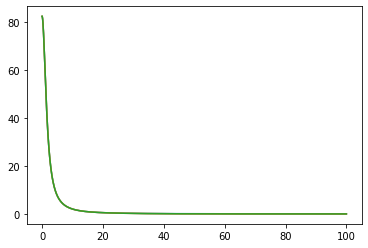

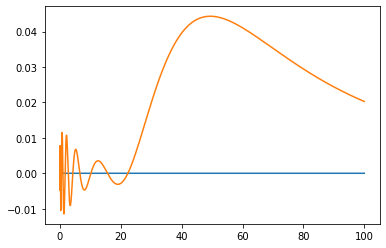

In [24]:

# function that evaluates values with fitted params at
# given inputs
def checker2(tlisttemp):
    y = []
    for i in tlisttemp:
        # print(i)
        
        temp = []
        for kkk,ck in enumerate(ckAR):
            
            temp.append(ck*exp(-vkAR[kkk]*i))
            
        y.append(sum(temp))
    return y


y3 = checker(tlist_temp, popt1[k-1],k)
y = checker2(tlist_temp)
plt.plot(tlist_temp, corrRana_temp, tlist_temp, y,tlist_temp, y3)
plt.show()  


plt.plot(tlist_temp,  [y[kkk]-y3[kkk] for kkk,t in enumerate(tlist_temp)])
plt.plot(tlist_temp,  [corrRana_temp[kkk]- y[kkk] for kkk,t in enumerate(tlist_temp)])
plt.show()  


In [1]:
#ckAR1 = list(popt1[k-1])[:len(list(popt1[k-1]))//2]
ckAI1 = list(popt2[k1-1])[:k1]
#0.5 from cosine
ckAI = [0.5*x+0j for x in ckAI1]

#dress with exp(id)

for kk in range(k1):
    ckAI[kk] = ckAI[kk]*exp(1.0j*list(popt2[k1-1])[3*k1+kk])

ckAI.extend(conjugate(ckAI)) #just directly double


# vkAR, vkAI
vkAI1 = list(popt2[k1-1])[k1:2*k1] #damping terms
wkAI1 = list(popt2[k1-1])[2*k1:3*k1] #oscillating term
vkAI = [-x-1.0j*wkAI1[kk] for kk, x in enumerate(vkAI1)] #combine
vkAI.extend([-x+1.0j*wkAI1[kk] for kk, x in enumerate(vkAI1)]) #double



print(ckAI)
print(vkAI)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


NameError: name 'popt2' is not defined

In [2]:

# function that evaluates values with fitted params at
# given inputs
def checker2(tlisttemp):
    y = []
    for i in tlisttemp:
        # print(i)
        
        temp = []
        for kkk,ck in enumerate(ckAI):
            if i==0: 
                print(vkAI[kkk])
            temp.append(ck*exp(-vkAI[kkk]*i))
            
        y.append(sum(temp))
    return y


y3 = checker(tlist_temp, popt2[k1-1],k1)


y = checker2(tlist_temp)
plt.plot(tlist_temp, corrIana_temp, tlist_temp, imag(y), tlist_temp, (y3))
plt.show()  


plt.plot(tlist_temp,  [imag(y[kkk])-imag(y3[kkk]) for kkk,t in enumerate(tlist_temp)])
plt.plot(tlist_temp,  [corrIana_temp[kkk]- y[kkk] for kkk,t in enumerate(tlist_temp)])

NameError: name 'checker' is not defined

In [3]:
#check the spectrum of the fit

def spectrum_matsubara_approx(w, ck, vk):
    """
    Calculates the approximate Matsubara correlation spectrum
    from ck and vk.

    Parameters
    ==========

    w: np.ndarray
        A 1D numpy array of frequencies.

    ck: float
        The coefficient of the exponential function.

    vk: float
        The frequency of the exponential function.
    """
    return ck*2*(vk)/(w**2 + vk**2)

def spectrum_approx(w, ck,vk):
    """
    Calculates the approximate non Matsubara correlation spectrum
    from the bath parameters.

    Parameters
    ==========
    w: np.ndarray
        A 1D numpy array of frequencies.

    coup_strength: float
        The coupling strength parameter.

    bath_broad: float
        A parameter characterizing the FWHM of the spectral density, i.e.,
        the bath broadening.

    bath_freq: float
        The bath frequency.
    """
    sw = []
    for kk,ckk in enumerate(ck):
        
        sw.append((ckk*(real(vk[kk]))/((w-imag(vk[kk]))**2+(real(vk[kk])**2))))
    return sw



In [164]:
spectrum_approx(wlist2,ckAR,vkAR)[0][400]

(-2.5625639951353295e-05+0j)

In [180]:
spectrum_approx(wlist2,[1.0j*ckk for ckk in ckAI],vkAI)

[array([-6.43246881e-07+2.55641847e-06j, -6.43304495e-07+2.55664744e-06j,
        -6.43362116e-07+2.55687644e-06j, ...,
        -3.95157054e-07+1.57044958e-06j, -3.95129218e-07+1.57033895e-06j,
        -3.95101385e-07+1.57022834e-06j]),
 array([-2.97940726e-07-7.91289724e-07j, -2.97964512e-07-7.91352895e-07j,
        -2.97988300e-07-7.91416073e-07j, ...,
        -2.97889414e-07-7.91153446e-07j, -2.97865638e-07-7.91090298e-07j,
        -2.97841864e-07-7.91027159e-07j]),
 array([3.95101385e-07+1.57022834e-06j, 3.95129218e-07+1.57033895e-06j,
        3.95157054e-07+1.57044958e-06j, ...,
        6.43362116e-07+2.55687644e-06j, 6.43304495e-07+2.55664744e-06j,
        6.43246881e-07+2.55641847e-06j]),
 array([2.97841864e-07-7.91027159e-07j, 2.97865638e-07-7.91090298e-07j,
        2.97889414e-07-7.91153446e-07j, ...,
        2.97988300e-07-7.91416073e-07j, 2.97964512e-07-7.91352895e-07j,
        2.97940726e-07-7.91289724e-07j])]

In [28]:
ckAR = [cktemp*(2/pi) for cktemp in ckAR]
ckAI = [cktemp*(2/pi) for cktemp in ckAI]

10


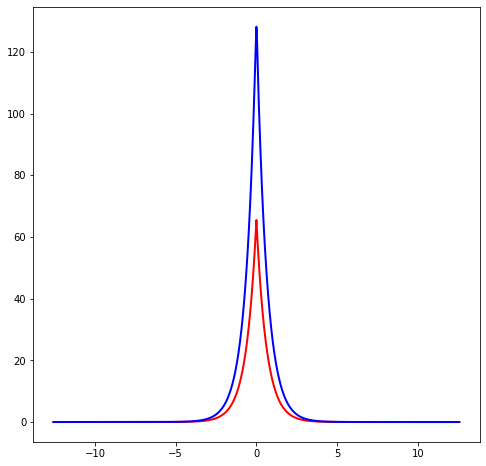

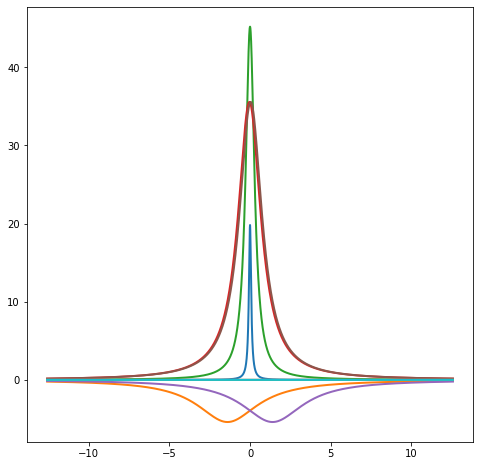

In [29]:
wlist2 = np.linspace(-1.5*Del,1.5*Del , 50000)


wlist2 = np.linspace(-2*pi*2,2 * pi *2 , 50000)
s1 =  [w * alpha * e**(-abs(w)/wc) *  ((1/(e**(w/T)-1))+1) for w in wlist2]
s2 =  spectrum_approx(wlist2,ckAR,vkAR)
s2.extend(spectrum_approx(wlist2,[1.0j*ckk for ckk in ckAI],vkAI))

#s2 =  spectrum_approx(wlist2,ckAI,vkAI)
print(len(s2))
s2sum = [0. for w in wlist2]
for s22 in s2:
    for kk,ww in enumerate(wlist2):
        s2sum[kk] += s22[kk]


fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(wlist2, s1, 'r', linewidth=2)
axes.plot(wlist2, s2sum, 'b', linewidth=2)

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
for sww in s2:
    axes.plot(wlist2, sww, linewidth=2)
#axes.plot(wlist2, s2sum, 'b', linewidth=2)

#axes.axvline(x=Del)





In [18]:

#each site is coupled to an independant bath in the site basis
Q=[basis(4,m)*basis(4,m).dag() for m in range(4)  ]

NR = len(ckAR)
NI = len(ckAI)
Q2 = []
ckAR2 = []
ckAI2 = []
vkAR2 = []
vkAI2 = []
for m in range(4):
    Q2.extend([ basis(4,m)*basis(4,m).dag() for kk in range(NR)])
    ckAR2.extend(ckAR)    
    vkAR2.extend(vkAR)
   
for m in range(4):
    Q2.extend([ basis(4,m)*basis(4,m).dag() for kk in range(NI)])
    ckAI2.extend(ckAI)
    vkAI2.extend(vkAI)
    
print(Q2)

options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)
Qsave = Q2

[Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data

In [193]:
energy, state = Hsys.eigenstates()

In [194]:
w01 = energy[1]-energy[0]
print(w01)
print(Del)

rat = (w01 * alpha * e**(-abs(w01)/wc) *  ((1/(e**(w01/T)-1))+1))/(-w01 * alpha * e**(-abs(w01)/wc) *  ((1/(e**(-w01/T)-1))+1))
print(rat)
print(w01/log(rat))

70.24814731040726
62.83185307179586
1.0010729765505777
65505.465001981116


In [195]:
s2 =  spectrum_approx(w01,ckAR,vkAR)
s2.extend(spectrum_approx(w01,[1.0j*ckk for ckk in ckAI],vkAI))


s2p = sum(s2)
s2 =  spectrum_approx(-w01,ckAR,vkAR)
s2.extend(spectrum_approx(-w01,[1.0j*ckk for ckk in ckAI],vkAI))

s2m = sum(s2)

rat2 = s2p/s2m
print(rat2)
print(w01/log(rat2))

(1.000034417516886-3.0170322650163844e-07j)
(2040936.2708812195+17890.496374943577j)


In [34]:
vkAI

[(1.5011526104752329-1.545707856446474j),
 (0.5965907351872214-0.0010449627188152753j),
 (1.5011526104752329+1.545707856446474j),
 (0.5965907351872214+0.0010449627188152753j)]

In [35]:
vkAR

[(0.08414090046262981+0j),
 (2.2867968030462897-1.3956642159010009j),
 (0.32616287596764+0j),
 (0.8527086743080766-0.04040595682674853j),
 (2.2867968030462897+1.3956642159010009j),
 (0.8527086743080766+0.04040595682674853j)]

In [23]:


NC = 3

NR2 = len(ckAR2)
NI2 = len(ckAI2)
print(NR2)
print(NI2)
#Q2 = [Q for kk in range(NR+NI)]
#print(Q2)
options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)
import time

start = time.time()

#HEOMFit = BosonicHEOMSolver(Hsys, Q2, ckAR2, ckAI2, vkAR2, vkAI2, NC, options=options)
HEOMFit = BosonicHEOMSolverPY(Hsys, Q2, ckAR2, ckAI2, vkAR2, vkAI2, NC, options=options)
print("hello")
end = time.time()
print(end - start)

16
16
hello
19.269012689590454


In [56]:
HEOMFit._ode.f_params[0]

array([ 0.       -7.92184004j,  0.       -1.01284947j,
        0.       -0.29782298j, ...,  0.       -1.01284947j,
        0.       -7.92184004j, -0.0841409+0.j        ])

In [54]:
(16*HEOMFit._N_he)

656

In [24]:
#tlist4=linspace(0,20,5000)
tlist4=linspace(0,1200,5000)
tlist4=linspace(0,20,5000)
tlist4=linspace(0,2000,20000)
#tlist4=linspace(0,0.4,1000)
# Initial state of the system.
rho0 = basis(4,0) * basis(4,0).dag()   
# Times to record state
#tlist = np.linspace(0, 40, 600)

resultFit = HEOMFit.run(rho0, tlist4)

In [57]:
qsave(resultFit)

In [21]:
# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate
P11p=basis(4,0) * basis(4,0).dag()
P22p=basis(4,1) * basis(4,1).dag()
P33p=basis(4,2) * basis(4,2).dag()
P44p=basis(4,3) * basis(4,3).dag()
# 1,2 element of density matrix  - corresonding to coherence
P12p=basis(4,0) * basis(4,1).dag()
# Calculate expectation values in the bases
P11expF4Nc2 = expect(resultFit.states, P11p)
P22expF4Nc2 = expect(resultFit.states, P22p)
P33expF4Nc2 = expect(resultFit.states, P33p)
P44expF4Nc2 = expect(resultFit.states, P44p)
P12expF4Nc2 = expect(resultFit.states, P12p)

#P11expF4RexpNc6t20v2 # v2 means real part is pruned for degenerate terms

#P12expF3RexpNc2  is from a fit on longer time scales. (100 instead of 50) and with 3 exponents in imag part too

In [31]:
#This is a simple Lindblad master equation, with rates corresponding to approximation each exponent in the correlation function
#as a delta function


#lam=2*pi*0.01*1000
#gamma = 2*pi*45*1000
#Temperature= 1000*(300./1.4387773538277202)*((2*pi*6.3)/126)*100
#beta = 1/Temperature
#approx_factr = ((2*lam / (beta*gamma)) - 1j*lam)
#approx_factr = ((2*lam / (beta*gamma)) - 1j*lam)

#tlist = np.linspace(0, 0.012, 12000)

#resultMEsec = mesolve(Hsys, initial_state, tlist, [np.sqrt(2.*approx_factr)*Qt for Qt in Q], [])

NameError: name 'initial_state' is not defined

In [65]:
#non-secular master equation thing

import time
import warnings
import numpy as np
import scipy.sparse as sp
from numpy import matrix
from numpy import linalg
from qutip import spre, spost, sprepost, thermal_dm, mesolve, Odeoptions
from qutip import tensor, identity, destroy, sigmax, sigmaz, basis, qeye, dims
from qutip.ui.progressbar import BaseProgressBar, TextProgressBar


def coth(x):
    """
    coth function
    """
    return 1./np.tanh(x)

prefns = 2.
prefns = 1.
def J0(w):
    #Jt  = 2 * w**s * alpha * (1./(wc**(s-1))) * e**(-abs(w)/wc)
    Jt = prefns *  w * alpha * e**(-abs(w)/wc)  
    return Jt

def J02(w):
    Jt  = prefns * alpha * (1./(wc**(s-1))) 
    return Jt

#def J0(energy):
#    #underdamped brownian oscillator
#    return 2 * lam * gamma * (energy)/(((energy**2) + (gamma**2)))
def nbs(energy,Temperature):
    beta=1./Temperature
    
    return 1./(np.exp(energy*beta) - 1.)

def Lnonsec(Hsys, Qlist, tlist, initial_state, Temperature,
            return_vals, eigen_sparse=False, options=None,progress_bar=None):
    

    if progress_bar is None:
        progress_bar = BaseProgressBar()
    elif progress_bar is True:
        progress_bar = TextProgressBar()
        
    if options is None:
        options = Options()
    output = None
    
    dot_energy, dot_state = Hsys.eigenstates(sparse=eigen_sparse)
    deltaE = dot_energy[1] - dot_energy[0]
    
    
    
    
    dimensions = dims(Qlist[0])
    Nmax = dimensions[1][0]        #hilbert space
    print(Nmax)
    #Nmax = 2       #hilbert space 
    
    H = Hsys
    L=0.*spre(Qlist[0])
    PsipreEta=0
    PsipreX=0

    all_energy, all_state = H.eigenstates(sparse=eigen_sparse)
    
    for Q in Qlist:
        Apre = spre(Q)
        Apost = spost(Q)
        for j in range(Nmax):
            for k in range(Nmax):
                A = Q.matrix_element(all_state[j].dag(), all_state[k])
                #A = sh.matrix_element(all_state[j].dag(), all_state[k])
                delE = (all_energy[j] - all_energy[k])
                if np.absolute(A) > 0:
                    if abs(delE) > 0.0:
                        #X = (0.5 * np.pi * gamma*(all_energy[j] - all_energy[k])
                        X = (0.5  * J0(all_energy[j] - all_energy[k])
                             * (np.cosh((all_energy[j] - all_energy[k]) /
                                (2 * Temperature))
                             / (np.sinh((all_energy[j] - all_energy[k]) /
                                (2 * Temperature)))) * A)
                        #eta = (0.5 * np.pi * gamma *
                        eta = (0.5 *  
                               J0(all_energy[j] - all_energy[k]) * A)
                        print("X:",X)
                        print("eta:",eta)
                        print("j:",all_energy[j], "k:",all_energy[k],"J(delta)",J0(all_energy[j] - all_energy[k]))
                        #if abs(X)>0:
                        PsipreX = PsipreX + X * all_state[j]*all_state[k].dag()
                        #if abs(eta)>0:
                        PsipreEta = PsipreEta + (eta * all_state[j]
                                                 * all_state[k].dag())
                    else:
                        #X =0.5  * np.pi* J0(0.) * A * 2 * Temperature
                        print("else")
                        X = 0.5  *  J02(0.) * A  * 2 * Temperature
                        #X =0.5 * np.pi * gamma * A * 2 * Temperature
                        #if abs(X)>:
                        PsipreX=PsipreX+X*all_state[j]*all_state[k].dag()

        A = Q
        L += ((-spre(A * PsipreX)) + (sprepost(A, PsipreX))
             +(sprepost(PsipreX, A)) + (-spost(PsipreX * A))
             +(spre(A * PsipreEta)) + (sprepost(A, PsipreEta))
             +(-sprepost(PsipreEta, A)) + (-spost(PsipreEta * A)))           

    #Setup the operators and the Hamiltonian and the master equation 
    #and solve for time steps in tlist
    psi0 = ( initial_state)
    output = mesolve(H, psi0, tlist, [L], return_vals, options=options,progress_bar=progress_bar)
    
    return output


#spectral density/w at w=0
#def J02(energy):
#    #underdamped brownian oscillator
#    return 2 * lam * gamma /( ((gamma**2)))              

In [66]:
print(Q)

[Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]], Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]]


In [68]:
#tlist4=linspace(0,0.4,1000)
#This is a non-secular master equation solution for comparison.  Plotted alongside HEOM result below
#tlist4=linspace(0,1200,5000)
#tlist4=linspace(0,20,5000)
#tlist4=linspace(0,20,5000)
Q3 = Q

#lam=2*pi*0.01*1000*2  #need a factor of 2 for someinternal consistency somewhere
#lam = 2*alpha
#gamma = 2*pi*45*1000
#gamma = wc
#tlist = np.linspace(0, 0.0004, 8000)

#tlist = np.linspace(0, 0.012, 12000)
options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)

#Temperature= 1000*(300./1.4387773538277202)*((2*pi*6.3)/126)*100
resultMEnonsec = Lnonsec(Hsys, Q3, tlist4,rho0, T, [],options=options)

4
else
X: (7.869716879744885e-14+0j)
eta: (-9.469840645487335e-18+0j)
j: 760.853042719599 k: 776.6179381414324 J(delta) -1.9997581579706617e-13
X: (-7.269566161248072e-33+0j)
eta: (2.5258046866180663e-36-0j)
j: 760.853042719599 k: 806.3726826838442 J(delta) -1.5666500122002685e-33
X: (-3.707786285301078e-44+0j)
eta: (1.755495541456608e-47-0j)
j: 760.853042719599 k: 822.8817312736367 J(delta) -8.285002342013199e-45
X: (7.869716879744885e-14+0j)
eta: (9.469840645487335e-18+0j)
j: 776.6179381414324 k: 760.853042719599 J(delta) 1.9997581579706617e-13
else
X: (-1.913484450529066e-21+0j)
eta: (4.345838932990309e-25-0j)
j: 776.6179381414324 k: 806.3726826838442 J(delta) -8.07314980031992e-23
X: (-9.759580109343785e-33+0j)
eta: (3.446393185683147e-36-0j)
j: 776.6179381414324 k: 822.8817312736367 J(delta) -4.871412326467383e-34
X: (-7.269566161248072e-33+0j)
eta: (-2.5258046866180663e-36+0j)
j: 806.3726826838442 k: 760.853042719599 J(delta) 1.5666500122002685e-33
X: (-1.913484450529066e-21+0j)


In [172]:
J0(all_energy[j] - all_energy[k])

NameError: name 'all_energy' is not defined

In [69]:
P11MENS =  expect(resultMEnonsec.states, P11p)
P12MENS =  expect(resultMEnonsec.states, P12p)


In [231]:
P11expF8

array([1.        , 0.46295506, 0.48901859, ..., 0.50632995, 0.50632648,
       0.50632301])

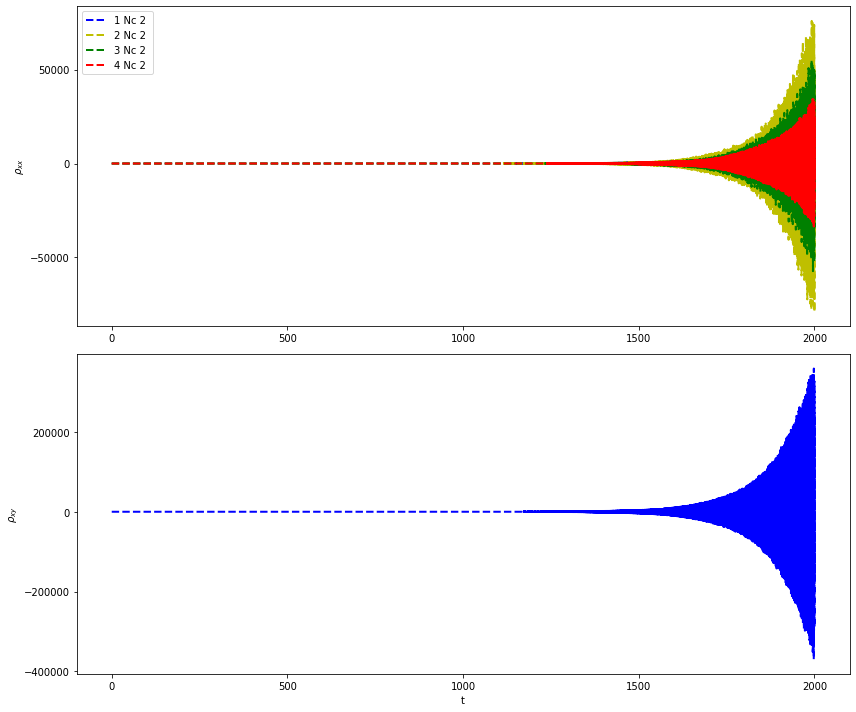

In [22]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,10))

#axes[0].plot(tlist4, np.real(P11MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")
#axes[0].plot(tlist4, np.real(P11expF4Nc2), 'g--', linewidth=2, label="Nc 2 Exp Real 4")
axes[0].plot(tlist4, np.real(P11expF4Nc2), 'b--', linewidth=2, label="1 Nc 2 ")
axes[0].plot(tlist4, np.real(P22expF4Nc2), 'y--', linewidth=2, label="2 Nc 2 ")
axes[0].plot(tlist4, np.real(P33expF4Nc2), 'g--', linewidth=2, label="3 Nc 2 ")
axes[0].plot(tlist4, np.real(P44expF4Nc2), 'r--', linewidth=2, label="4 Nc 2 ")
#axes[0].plot(tlist4, np.real(P11expF4Nc8), 'g--', linewidth=2, label="Nc 8 Exp Real 4")

axes[0].locator_params(axis='y', nbins=6)
axes[0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0].set_ylabel(r"$\rho_{xx}$")#, fontsize=20)
axes[0].legend(loc=0)
#axes[0].set_xlim(0,2)
#axes[0].Rectangle(

#notes:

#New fit is with b < 0, so no positive growth

#longer fit was with tmax = 100, 10,000 data points. it ruined nexp=4 for some reason, i needed to do nexp=6 to get 
#same as nexp=4 with shorter time fit.  this might be because the t =0 value was smaller. odd.

#seems like Nc =2 is not converged at short times?

#so I will work with nexp =4, (3 imaginary), and try Nc = 4


#axes[1].plot(tlist4, np.real(P12MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")
#axes[1].plot(tlist4, np.real(P12expF4Nc2), 'g--', linewidth=2, label="Nc 2 Exp Real 4")
axes[1].plot(tlist4, np.real(P12expF4Nc2), 'b--', linewidth=2, label="12 Nc 2")
#axes[1].plot(tlist4, np.real(P12expF4Nc6), 'y--', linewidth=2, label="Nc 6 Exp Real 4")
#axes[1].plot(tlist4, np.real(P12expF4Nc8), 'g--', linewidth=2, label="Nc 8 Exp Real 4")

axes[1].locator_params(axis='y', nbins=6)
axes[1].locator_params(axis='x', nbins=6)


#axes[1].set_xlim(0,2)

#axes[1].set_ylim(0.375,0.395)

axes[1].set_xlabel(r't')#, fontsize=20)
axes[1].set_ylabel(r'$\rho_{xy}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()


#fig.savefig("corrfit.pdf")



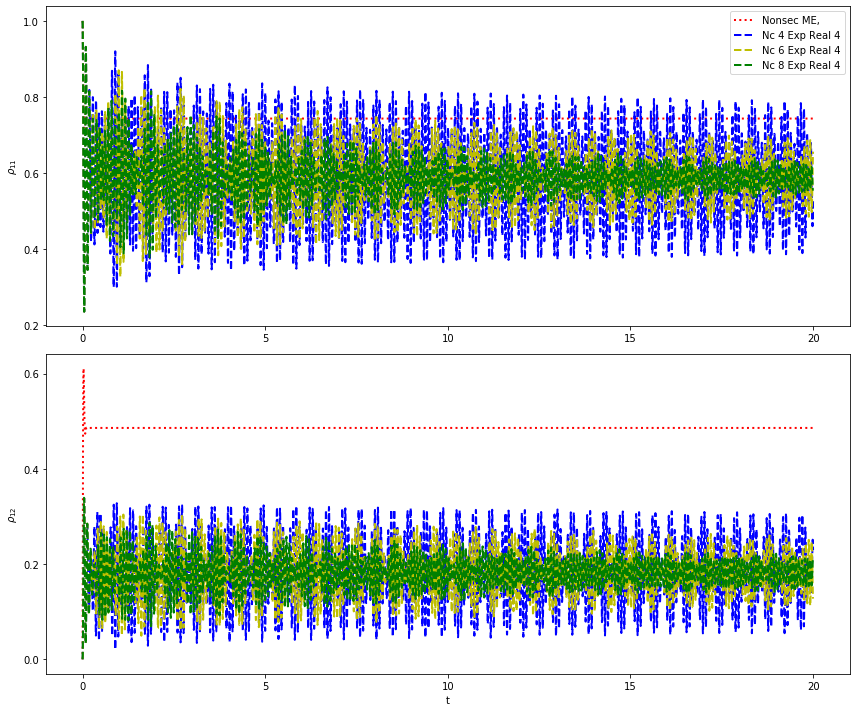

In [148]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,10))

axes[0].plot(tlist4, np.real(P11MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")
#axes[0].plot(tlist4, np.real(P11expF4Nc2), 'g--', linewidth=2, label="Nc 2 Exp Real 4")
axes[0].plot(tlist4, np.real(P11expF4Nc4), 'b--', linewidth=2, label="Nc 4 Exp Real 4")
axes[0].plot(tlist4, np.real(P11expF4Nc6), 'y--', linewidth=2, label="Nc 6 Exp Real 4")
axes[0].plot(tlist4, np.real(P11expF4Nc8), 'g--', linewidth=2, label="Nc 8 Exp Real 4")

axes[0].locator_params(axis='y', nbins=6)
axes[0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0].set_ylabel(r"$\rho_{11}$")#, fontsize=20)
axes[0].legend(loc=0)
#axes[0].set_xlim(0,2)
#axes[0].Rectangle(

#notes:

#New fit is with b < 0, so no positive growth

#longer fit was with tmax = 100, 10,000 data points. it ruined nexp=4 for some reason, i needed to do nexp=6 to get 
#same as nexp=4 with shorter time fit.  this might be because the t =0 value was smaller. odd.

#seems like Nc =2 is not converged at short times?

#so I will work with nexp =4, (3 imaginary), and try Nc = 4


axes[1].plot(tlist4, np.real(P12MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")
#axes[1].plot(tlist4, np.real(P12expF4Nc2), 'g--', linewidth=2, label="Nc 2 Exp Real 4")
axes[1].plot(tlist4, np.real(P12expF4Nc4), 'b--', linewidth=2, label="Nc 4 Exp Real 4")
axes[1].plot(tlist4, np.real(P12expF4Nc6), 'y--', linewidth=2, label="Nc 6 Exp Real 4")
axes[1].plot(tlist4, np.real(P12expF4Nc8), 'g--', linewidth=2, label="Nc 8 Exp Real 4")

axes[1].locator_params(axis='y', nbins=6)
axes[1].locator_params(axis='x', nbins=6)


#axes[1].set_xlim(0,2)

#axes[1].set_ylim(0.375,0.395)

axes[1].set_xlabel(r't')#, fontsize=20)
axes[1].set_ylabel(r'$\rho_{12}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()





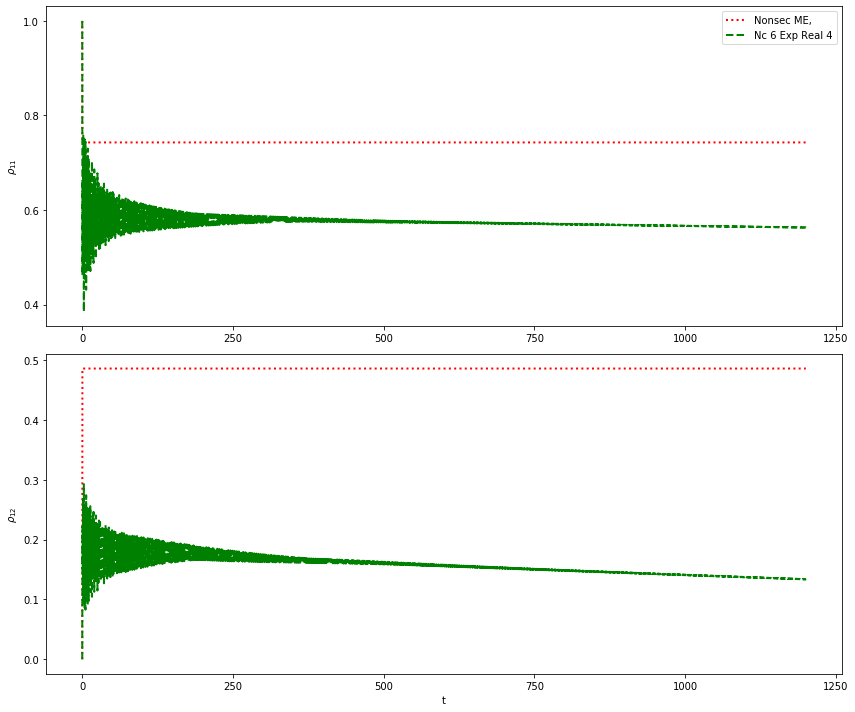

In [136]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,10))

axes[0].plot(tlist4, np.real(P11MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")

#axes[0].plot(tlist4, np.real(P11expF4Nc4long), 'b--', linewidth=2, label="Nc 4 Exp Real 4")
axes[0].plot(tlist4, np.real(P11expF4Nc6long), 'g--', linewidth=2, label="Nc 6 Exp Real 4")

axes[0].locator_params(axis='y', nbins=6)
axes[0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0].set_ylabel(r"$\rho_{11}$")#, fontsize=20)
axes[0].legend(loc=0)
#axes[0].set_xlim(0,2)
#axes[0].Rectangle(

#notes:

#New fit is with b < 0, so no positive growth

#longer fit was with tmax = 100, 10,000 data points. it ruined nexp=4 for some reason, i needed to do nexp=6 to get 
#same as nexp=4 with shorter time fit.  this might be because the t =0 value was smaller. odd.

#seems like Nc =2 is not converged at short times?

#so I will work with nexp =4, (3 imaginary), and try Nc = 4


axes[1].plot(tlist4, np.real(P12MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")

#axes[1].plot(tlist4, np.real(P12expF4Nc4long), 'b--', linewidth=2, label="Nc 4 Exp Real 4")
axes[1].plot(tlist4, np.real(P12expF4Nc6long), 'g--', linewidth=2, label="Nc 6 Exp Real 4")


axes[1].locator_params(axis='y', nbins=6)
axes[1].locator_params(axis='x', nbins=6)


#axes[1].set_xlim(0,2)

#axes[1].set_ylim(0.375,0.395)

axes[1].set_xlabel(r't')#, fontsize=20)
axes[1].set_ylabel(r'$\rho_{12}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()




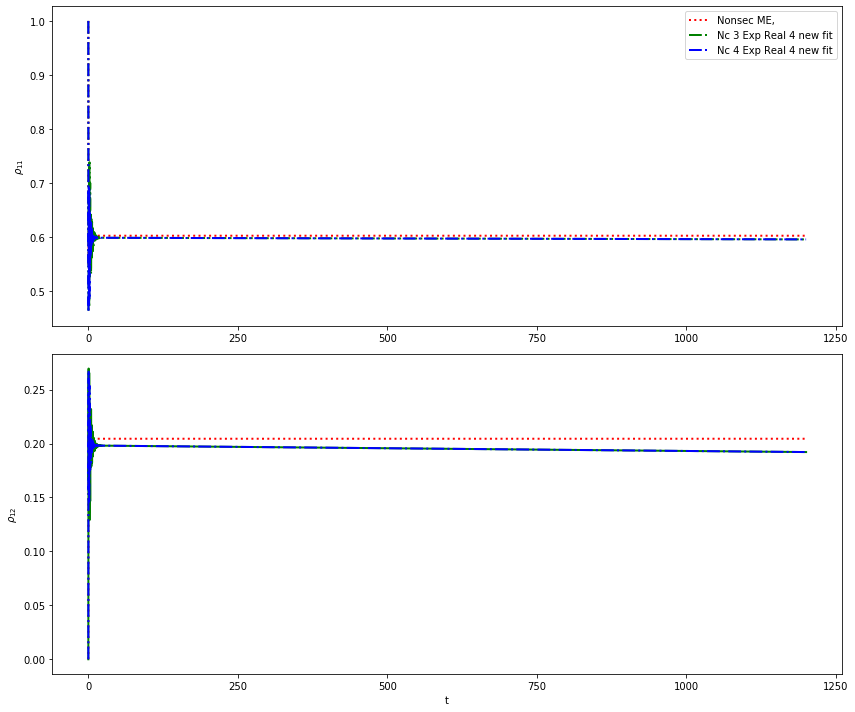

In [344]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,10))


#axes[0].plot(tlist4, np.real(P11expF ), 'g', linewidth=2, label=r"Fit $Nc = 6$ exp 2,")
#axes[0].plot(tlist4, np.real(P11expF4 ), 'b:', linewidth=2, label=r"Fit $Nc = 4$, more exp")

axes[0].plot(tlist4, np.real(P11MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")
#axes[0].plot(tlist4, np.real(P11expF4RexpNc2v2), 'y-.', linewidth=2, label="Nc 2 Exp Real 4 new fit")
axes[0].plot(tlist4, np.real(P11expF4RexpNc3v2), 'g-.', linewidth=2, label="Nc 3 Exp Real 4 new fit")

axes[0].plot(tlist4, np.real(P11expF4RexpNc4), 'b-.', linewidth=2, label="Nc 4 Exp Real 4 new fit")

#axes[0].plot(tlist4, np.real(P11expF6RexpNc2), 'b-.', linewidth=2, label="Nc 2 Exp Real 6 new longer fit")
#axes[0].plot(tlist4, np.real(P11expF3RexpNc3), 'b-.', linewidth=2, label="Nc 3 Exp Real 3 new longer fit")
 
    
    
#axes[0].plot(tlist4, np.real(P11expF4RexpNc2), 'y-.', linewidth=2, label="Nc 2 Exp Real 4")
#axes[0].plot(tlist4, np.real(P11expF2), 'y-.', linewidth=2, label="Nc 2")
#axes[0].plot(tlist4, np.real(P11expF42), 'y-.', linewidth=2, label="Nc 4")
#axes[0].plot(tlist4, np.real(P11expF8), 'y-.', linewidth=2, label="Nc 8")



axes[0].locator_params(axis='y', nbins=6)
axes[0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0].set_ylabel(r"$\rho_{11}$")#, fontsize=20)
axes[0].legend(loc=0)
#axes[0].set_xlim(0,100)
#axes[0].Rectangle(

#notes:

#New fit is with b < 0, so no positive growth

#longer fit was with tmax = 100, 10,000 data points. it ruined nexp=4 for some reason, i needed to do nexp=6 to get 
#same as nexp=4 with shorter time fit.  this might be because the t =0 value was smaller. odd.

#seems like Nc =2 is not converged at short times?

#so I will work with nexp =4, (3 imaginary), and try Nc = 4


#axes[1].plot(tlist4, np.real(P12expF ), 'g', linewidth=2, label=r"Fit $Nc 6$ exp 2,")
#axes[1].plot(tlist4, np.real(P12expF4 ), 'b:', dashes=[2,2], linewidth=2, label=r"Fit $Nc 4$, more exp")
axes[1].plot(tlist4, np.real(P12MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")
#axes[1].plot(tlist4, np.real(P12expF4RexpNc2v2), 'y-.', linewidth=2, label="Nc 2 Exp Real 4 new fit")
axes[1].plot(tlist4, np.real(P12expF4RexpNc3v2), 'g-', linewidth=2, label="Nc 3 Exp Real 4 new fit")

axes[1].plot(tlist4, np.real(P12expF4RexpNc4), 'b-.', linewidth=2, label="Nc 4 Exp Real 4 new fit")

#axes[1].plot(tlist4, np.real(P12expF6RexpNc2), 'b-.', linewidth=2, label="Nc 2 Exp Real 6 new longer fit")

#axes[1].plot(tlist4, np.real(P12expF3RexpNc3), 'b-.', linewidth=2, label="Nc 2 Exp Real 3 new longer fit")
#axes[1].plot(tlist4, np.real(P12expF4RexpNc2), 'y-.', linewidth=2, label="Nc 2 Exp Real 4")
#axes[1].plot(tlist4, np.real(P12expF2), 'y-.', linewidth=2, label="Nc 2")
#axes[1].plot(tlist4, np.real(P12expF42), 'y-.', linewidth=2, label="Nc 4")
#axes[1].plot(tlist4, np.real(P12expF8), 'y-.', linewidth=2, label="Nc 8")

axes[1].locator_params(axis='y', nbins=6)
axes[1].locator_params(axis='x', nbins=6)



#axes[1].set_ylim(0.375,0.395)
#axes[1].set_xlim(0,100)
axes[1].set_xlabel(r't')#, fontsize=20)
axes[1].set_ylabel(r'$\rho_{12}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()




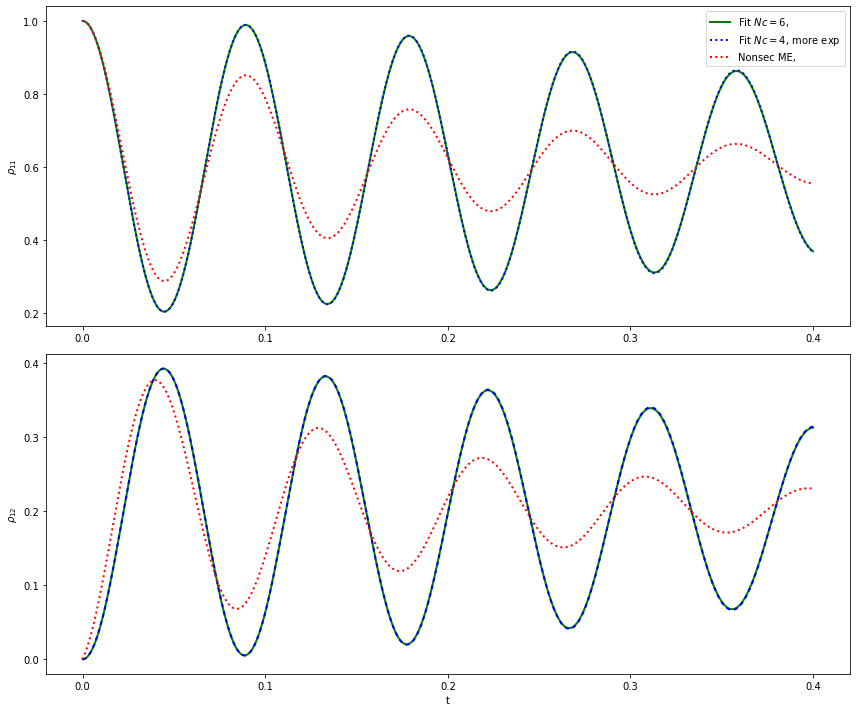

In [204]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,10))

#axes[0].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[0].plot(tlist4, np.real(P11expF ), 'g', linewidth=2, label=r"Fit $Nc = 6$,")
axes[0].plot(tlist4, np.real(P11expF4 ), 'b:', linewidth=2, label=r"Fit $Nc = 4$, more exp")
axes[0].plot(tlist4, np.real(P11MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")
#axes[0].plot(tlist, np.real(P11expF1e6 ),  color='purple', dashes=[6, 2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & terminator")


axes[0].locator_params(axis='y', nbins=6)
axes[0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0].set_ylabel(r"$\rho_{11}$")#, fontsize=20)
axes[0].legend(loc=0)
#axes[0].Rectangle(




axes[1].plot(tlist4, np.real(P12expF ), 'g', linewidth=2, label=r"Fit $Nc 6$,")
axes[1].plot(tlist4, np.real(P12expF4 ), 'b:', dashes=[2,2], linewidth=2, label=r"Fit $Nc 4$, more exp")
axes[1].plot(tlist4, np.real(P12MENS ), 'r:', linewidth=2, label=r"Nonsec ME,")

axes[1].locator_params(axis='y', nbins=6)
axes[1].locator_params(axis='x', nbins=6)



#axes[1].set_ylim(0.375,0.395)
#axes[1].set_xlim(200,600)
axes[1].set_xlabel(r't')#, fontsize=20)
axes[1].set_ylabel(r'$\rho_{12}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()



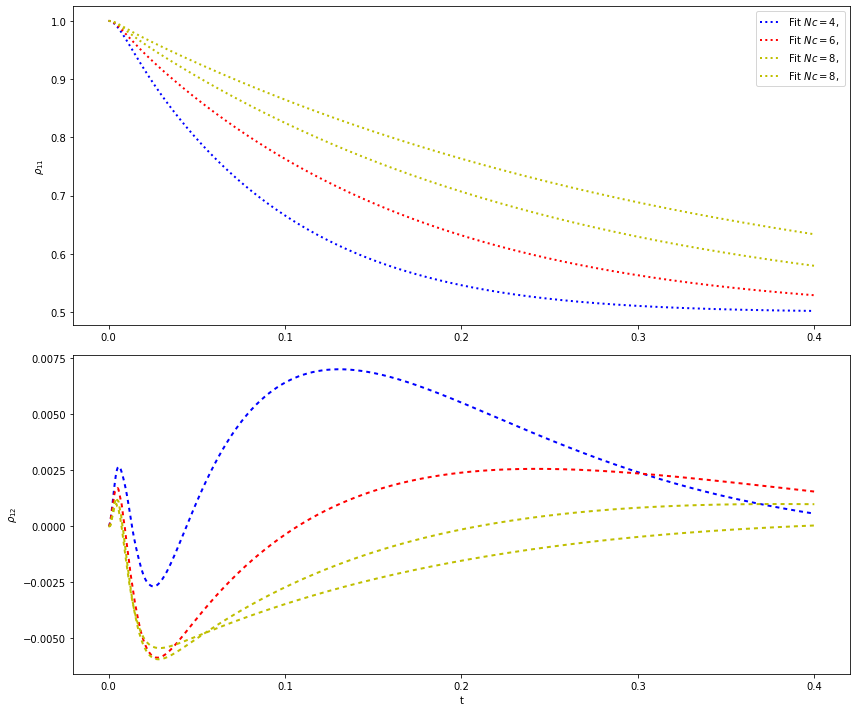

In [47]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,10))

#axes[0].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[0].plot(tlist4, np.real(P11expF ), 'b:', linewidth=2, label=r"Fit $Nc = 4$, ")
axes[0].plot(tlist4, np.real(P11expF6 ), 'r:', linewidth=2, label=r"Fit $Nc = 6$,")
axes[0].plot(tlist4, np.real(P11expF8 ), 'y:', linewidth=2, label=r"Fit $Nc = 8$,")
axes[0].plot(tlist4, np.real(P11expF10 ), 'g:', linewidth=2, label=r"Fit $Nc = 8$,")
#axes[0].plot(tlist, np.real(P11expF1e6 ),  color='purple', dashes=[6, 2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & terminator")


axes[0].locator_params(axis='y', nbins=6)
axes[0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0].set_ylabel(r"$\rho_{11}$")#, fontsize=20)
axes[0].legend(loc=0)
#axes[0].Rectangle(




axes[1].plot(tlist4, np.real(P12expF ), 'b', dashes=[2,2], linewidth=2, label=r"Fit $Nc = 4$,")
axes[1].plot(tlist4, np.real(P12expF6 ), 'r', dashes=[2,2], linewidth=2, label=r"Fit $Nc 6$,")
axes[1].plot(tlist4, np.real(P12expF8 ), 'y', dashes=[2,2], linewidth=2, label=r"Fit $Nc 8$,")
axes[1].plot(tlist4, np.real(P12expF10 ), 'g', dashes=[2,2], linewidth=2, label=r"Fit $Nc 8$,")


axes[1].locator_params(axis='y', nbins=6)
axes[1].locator_params(axis='x', nbins=6)



#axes[1].set_ylim(0.375,0.395)
#axes[1].set_xlim(200,600)
axes[1].set_xlabel(r't')#, fontsize=20)
axes[1].set_ylabel(r'$\rho_{12}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()



In [71]:
#lmaxmats = 100000


#do version with tanimura terminator

op = -2*spre(Q)*spost(Q.dag()) + spre(Q.dag()*Q) + spost(Q.dag()*Q)

approx_factr = ((2 * lam / (beta * gamma)) - 1j*lam) 

approx_factr -=  lam * gamma * (-1.0j + cot(gamma / (2 * T)))/gamma

for k in range(1,lmaxmats):
    vk = 2 * np.pi * k * T
    #c_temp.append((pref * 4 * lam * gamma * T * vk / (vk**2 - gamma**2))  * np.exp(- vk * t) ) 
    approx_factr -= ((pref * 4 * lam * gamma * T * vk / (vk**2 - gamma**2))/ vk)
    #approx_factr -= (c[k] / nu[k])
    
print(approx_factr)
L_bnd = -approx_factr*op
print(approx_factr)
Ltot = -1.0j*(spre(Hsys)-spost(Hsys)) + L_bnd
#Ltot = liouvillian(Hsys) + L_bnd

NR = len(ckAR)
NI = len(ckAI)
Q2 = [Q for kk in range(NR+NI)]
print(Q2)
options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)


NC= 10
HEOMFitT = BosonicHEOMSolver(Ltot, Q2, ckAR, ckAI, vkAR, vkAI, NC, options=options)

# Initial state of the system.
rho0 = basis(2,0) * basis(2,0).dag()   
# Times to record state
#tlist = np.linspace(0, 40, 600)



resultFitT  = HEOMFitT.run(rho0, tlist)




(2.0264246863265754e-09+0j)
(2.0264246863265754e-09+0j)
[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]]
making python csr matrix


KeyboardInterrupt: 

In [ ]:


resultFitT  = HEOMFitT.run(rho0, tlist)


In [50]:
# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate
P11p=basis(2,0) * basis(2,0).dag()
P22p=basis(2,1) * basis(2,1).dag()
# 1,2 element of density matrix  - corresonding to coherence
P12p=basis(2,0) * basis(2,1).dag()
# Calculate expectation values in the bases
P11expFT   = expect(resultFitT.states, P11p)
P22expFT   = expect(resultFitT.states, P22p)
P12expFT   = expect(resultFitT.states, P12p)

In [53]:
print(Hsys.eigenstates())
energies, states = Hsys.eigenstates()

(array([-0.55901699,  0.55901699]), array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.52573111]
 [-0.85065081]],
       Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.85065081]
 [-0.52573111]]], dtype=object))


In [47]:
print(Hsys.eigenstates())
energies, states = Hsys.eigenstates()
rhoss = (states[0]*states[0].dag()*exp(-beta*energies[0]) + states[1]*states[1].dag()*exp(-beta*energies[1]))
rhoss = rhoss/rhoss.norm()

P12 = expect(rhoss,P12p)
P11 = expect(rhoss,P11p)

(array([-0.55901699,  0.55901699]), array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.52573111]
 [-0.85065081]],
       Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.85065081]
 [-0.52573111]]], dtype=object))


In [40]:
qsave(resultMats, 'resultMats')
qsave(resultMatsT, 'resultMatsT')
qsave(resultPade, 'resultPade')
qsave(resultFit, 'resultFit')
qsave(resultFitT, 'resultFitT')

In [41]:
qsave(resultPade, 'resultPade')

In [42]:
qsave(resultFit, 'resultFit')

In [69]:
qsave(resultFit1e6, 'resultFit1e6')

In [75]:
qsave(resultFit1e6, 'resultFit1e6N8')

In [45]:
qsave(resultFitT, 'resultFitT')

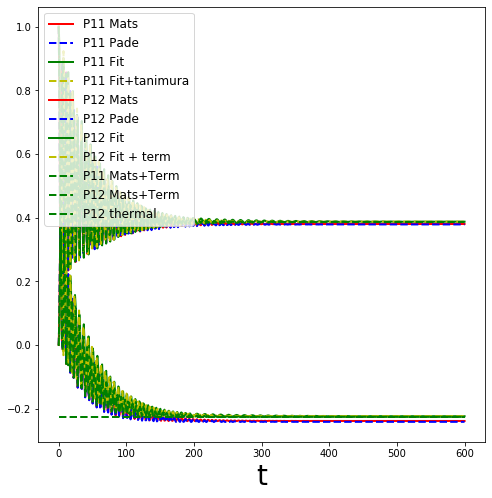

In [47]:
#big gamma
# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate

# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
#axes.plot(tlist, np.real(P11exp)+ np.real(P22exp), 'b', linewidth=2, label="P11")
axes.plot(tlist, np.real(P11exp), 'r', linewidth=2, label="P11 Mats")
axes.plot(tlist, np.real(P11expP), 'b--', linewidth=2, label="P11 Pade")
axes.plot(tlist, np.real(P11expF), 'g', linewidth=2, label="P11 Fit")
axes.plot(tlist, np.real(P11expFT), 'y--', linewidth=2, label="P11 Fit+tanimura")

axes.plot(tlist, np.real(P12exp), 'r', linewidth=2, label="P12 Mats")
axes.plot(tlist, np.real(P12expP), 'b--', linewidth=2, label="P12 Pade")
axes.plot(tlist, np.real(P12expF), 'g', linewidth=2, label="P12 Fit")
axes.plot(tlist, np.real(P12expFT), 'y--', linewidth=2, label="P12 Fit + term")

axes.plot(tlist, np.real(P11expT), 'g--', linewidth=2, label="P11 Mats+Term")
axes.plot(tlist, np.real(P12expT), 'g--', linewidth=2, label="P12 Mats+Term")

axes.plot(tlist, [np.real(P12) for t in tlist], 'g--', linewidth=2, label="P12 thermal")

#axes.plot(tlist, [np.real(P11RC) for t in tlist], 'g--', linewidth=2, label="P12 thermal")

axes.set_xlabel(r't', fontsize=28)
axes.legend(loc=0, fontsize=12)



In [48]:
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['axes.titlesize'] = 25
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['font.family'] = 'STIXGeneral' 
matplotlib.rcParams['mathtext.fontset'] =  'stix'

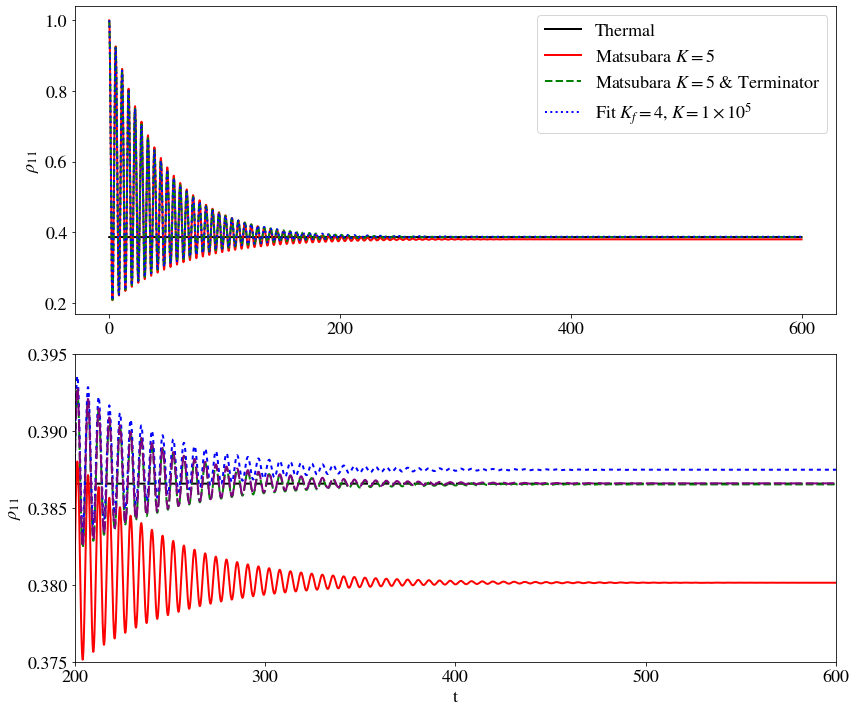

In [133]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 1, sharex=False, figsize=(12,10))

axes[0].plot(tlist, [np.real(P11) for t in tlist], 'black', ls='-',linewidth=2, label="Thermal")
axes[0].plot(tlist, np.real(P11exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[0].plot(tlist, np.real(P11expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[0].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[0].plot(tlist, np.real(P11expF ), 'b:', linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[0].plot(tlist, np.real(P11expF1e6 ),  color='purple', dashes=[6, 2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & terminator")


axes[0].locator_params(axis='y', nbins=6)
axes[0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0].set_ylabel(r"$\rho_{11}$")#, fontsize=20)
axes[0].legend(loc=0)
#axes[0].Rectangle(




axes[1].plot(tlist, [np.real(P11) for t in tlist], 'black', ls='--', linewidth=2, label="Thermal")
axes[1].plot(tlist, np.real(P11exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[1].plot(tlist, np.real(P11expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[1].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[1].plot(tlist, np.real(P11expF ), 'b', dashes=[2,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
axes[1].plot(tlist, np.real(P11expTK2 ), color='purple', dashes=[6,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & Terminator")



axes[1].locator_params(axis='y', nbins=6)
axes[1].locator_params(axis='x', nbins=6)



axes[1].set_ylim(0.375,0.395)
axes[1].set_xlim(200,600)
axes[1].set_xlabel(r't')#, fontsize=20)
axes[1].set_ylabel(r'$\rho_{11}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()
fig.savefig("fig1.pdf")

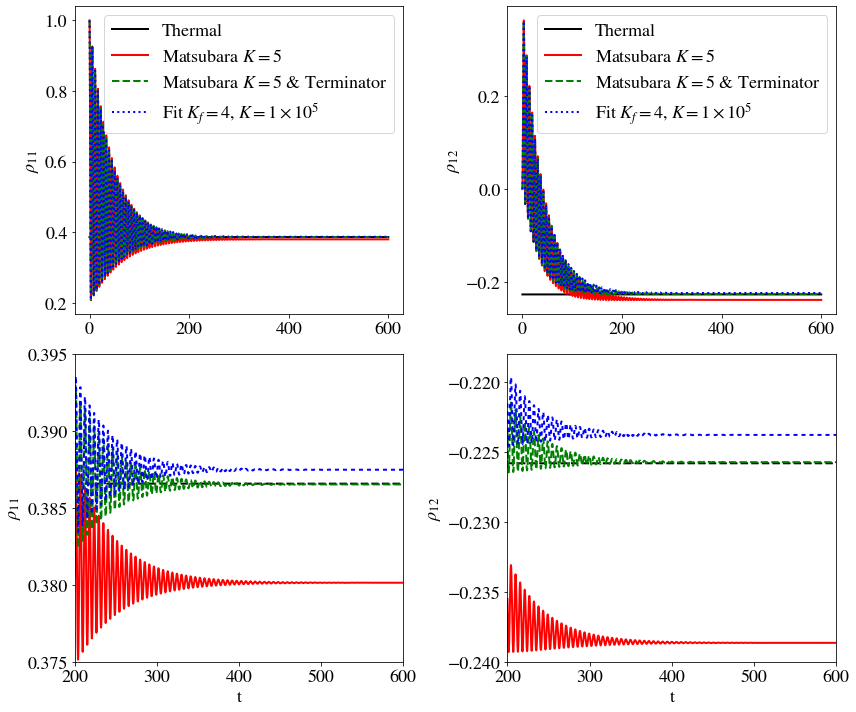

In [142]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(12,10))

axes[0][0].plot(tlist, [np.real(P11) for t in tlist], 'black', ls='-',linewidth=2, label="Thermal")
axes[0][0].plot(tlist, np.real(P11exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[0][0].plot(tlist, np.real(P11expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[0].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[0][0].plot(tlist, np.real(P11expF ), 'b:', linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[0].plot(tlist, np.real(P11expF1e6 ),  color='purple', dashes=[6, 2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & terminator")


axes[0][0].locator_params(axis='y', nbins=6)
axes[0][0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0][0].set_ylabel(r"$\rho_{11}$")#, fontsize=20)
axes[0][0].legend(loc=0)
#axes[0].Rectangle(




axes[1][0].plot(tlist, [np.real(P11) for t in tlist], 'black', ls='--', linewidth=2, label="Thermal")
axes[1][0].plot(tlist, np.real(P11exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[1][0].plot(tlist, np.real(P11expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[1].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[1][0].plot(tlist, np.real(P11expF ), 'b', dashes=[2,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[1].plot(tlist, np.real(P11expF1e6 ), color='purple', dashes=[6,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & Terminator")



axes[1][0].locator_params(axis='y', nbins=6)
axes[1][0].locator_params(axis='x', nbins=6)



axes[1][0].set_ylim(0.375,0.395)
axes[1][0].set_xlim(200,600)
axes[1][0].set_xlabel(r't')#, fontsize=20)
axes[1][0].set_ylabel(r'$\rho_{11}$')#, fontsize=20)
#axes[1].legend(loc=0)


axes[0][1].plot(tlist, [np.real(P12) for t in tlist], 'black', ls='-',linewidth=2, label="Thermal")
axes[0][1].plot(tlist, np.real(P12exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[0][1].plot(tlist, np.real(P12expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[0].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[0][1].plot(tlist, np.real(P12expF ), 'b:', linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[0].plot(tlist, np.real(P11expF1e6 ),  color='purple', dashes=[6, 2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & terminator")


axes[0][1].locator_params(axis='y', nbins=6)
axes[0][1].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0][1].set_ylabel(r"$\rho_{12}$")#, fontsize=20)
axes[0][1].legend(loc=0)
#axes[0].Rectangle(




axes[1][1].plot(tlist, [np.real(P12RC) for t in tlist], 'black', ls='--', linewidth=2, label="Thermal")
axes[1][1].plot(tlist, np.real(P12exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[1][1].plot(tlist, np.real(P12expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[1].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[1][1].plot(tlist, np.real(P12expF ), 'b', dashes=[2,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[1].plot(tlist, np.real(P11expF1e6 ), color='purple', dashes=[6,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & Terminator")



axes[1][1].locator_params(axis='y', nbins=6)
axes[1][1].locator_params(axis='x', nbins=6)



axes[1][1].set_ylim(-0.24,-0.218)
axes[1][1].set_xlim(200,600)
axes[1][1].set_xlabel(r't')#, fontsize=20)
axes[1][1].set_ylabel(r'$\rho_{12}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()
#fig.savefig("fig1.pdf")

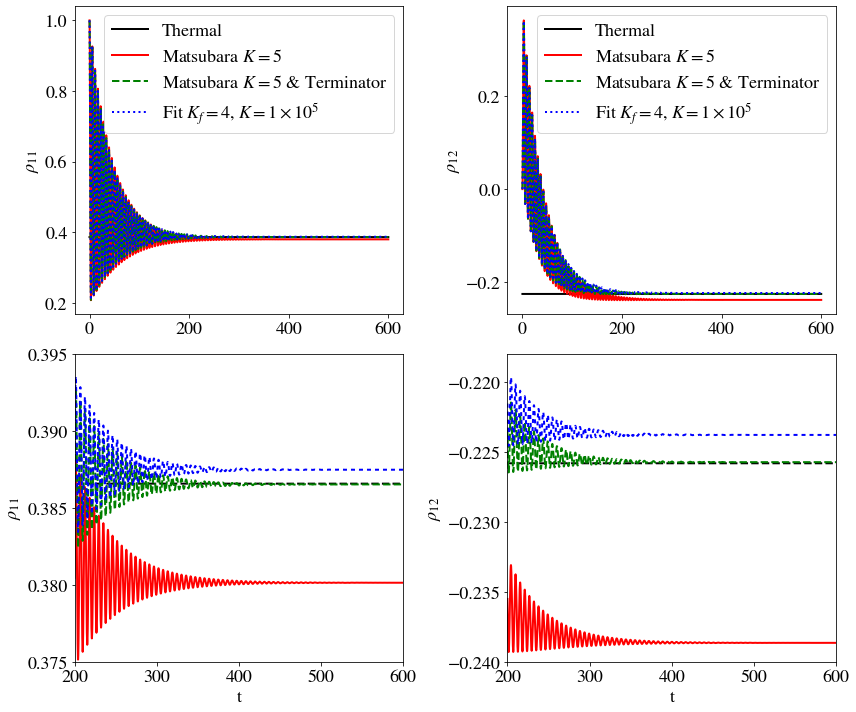

In [143]:
#matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix','text.usetex': False})

# Plot the results
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(12,10))

axes[0][0].plot(tlist, [np.real(P11) for t in tlist], 'black', ls='-',linewidth=2, label="Thermal")
axes[0][0].plot(tlist, np.real(P11exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[0][0].plot(tlist, np.real(P11expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[0].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[0][0].plot(tlist, np.real(P11expF ), 'b:', linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[0].plot(tlist, np.real(P11expF1e6 ),  color='purple', dashes=[6, 2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & terminator")


axes[0][0].locator_params(axis='y', nbins=6)
axes[0][0].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0][0].set_ylabel(r"$\rho_{11}$")#, fontsize=20)
axes[0][0].legend(loc=0)
#axes[0].Rectangle(




axes[1][0].plot(tlist, [np.real(P11) for t in tlist], 'black', ls='--', linewidth=2, label="Thermal")
axes[1][0].plot(tlist, np.real(P11exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[1][0].plot(tlist, np.real(P11expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[1].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[1][0].plot(tlist, np.real(P11expF ), 'b', dashes=[2,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[1].plot(tlist, np.real(P11expF1e6 ), color='purple', dashes=[6,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & Terminator")



axes[1][0].locator_params(axis='y', nbins=6)
axes[1][0].locator_params(axis='x', nbins=6)



axes[1][0].set_ylim(0.375,0.395)
axes[1][0].set_xlim(200,600)
axes[1][0].set_xlabel(r't')#, fontsize=20)
axes[1][0].set_ylabel(r'$\rho_{11}$')#, fontsize=20)
#axes[1].legend(loc=0)


axes[0][1].plot(tlist, [np.real(P12RC) for t in tlist], 'black', ls='-',linewidth=2, label="Thermal")
axes[0][1].plot(tlist, np.real(P12exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[0][1].plot(tlist, np.real(P12expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[0].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[0][1].plot(tlist, np.real(P12expF ), 'b:', linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[0].plot(tlist, np.real(P11expF1e6 ),  color='purple', dashes=[6, 2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & terminator")


axes[0][1].locator_params(axis='y', nbins=6)
axes[0][1].locator_params(axis='x', nbins=6)


#axes[0].set_xlim(0,200)
axes[0][1].set_ylabel(r"$\rho_{12}$")#, fontsize=20)
axes[0][1].legend(loc=0)
#axes[0].Rectangle(




axes[1][1].plot(tlist, [np.real(P12RC) for t in tlist], 'black', ls='--', linewidth=2, label="Thermal")
axes[1][1].plot(tlist, np.real(P12exp), 'r', linewidth=2, label="Matsubara $K=5$")
axes[1][1].plot(tlist, np.real(P12expT), 'g--', linewidth=2, label="Matsubara $K=5$ & Terminator")
#axes[1].plot(tlist, np.real(P11expP), 'y-.', linewidth=2, label="Pade $K=5$")
axes[1][1].plot(tlist, np.real(P12expF ), 'b', dashes=[2,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$")
#axes[1].plot(tlist, np.real(P11expF1e6 ), color='purple', dashes=[6,2], linewidth=2, label=r"Fit $K_f = 4$, $K=1\times 10^5$ & Terminator")



axes[1][1].locator_params(axis='y', nbins=6)
axes[1][1].locator_params(axis='x', nbins=6)



axes[1][1].set_ylim(-0.24,-0.218)
axes[1][1].set_xlim(200,600)
axes[1][1].set_xlabel(r't')#, fontsize=20)
axes[1][1].set_ylabel(r'$\rho_{12}$')#, fontsize=20)
#axes[1].legend(loc=0)

fig.tight_layout()
fig.savefig("fig1.pdf")

In [140]:
dot_energy, dot_state = Hsys.eigenstates()
deltaE = dot_energy[1] - dot_energy[0]

gamma2 = deltaE / (2 * np.pi * gamma)
wa = 2 * np.pi * gamma2 *   gamma # reaction coordinate frequency
g = np.sqrt(np.pi * wa * lam / 2.0)  # reaction coordinate coupling
g = np.sqrt(np.pi * wa * lam / 4.0)  # reaction coordinate coupling Factor over 2 because of diff in J(w) (I have 2 lam now)
#nb = (1 / (np.exp(wa/w_th) - 1))

NRC = 10

Hsys_exp = tensor(qeye(NRC), Hsys)
Q_exp = tensor(qeye(NRC), Q)
a = tensor(destroy(NRC), qeye(2))

H0 = wa * a.dag() * a + Hsys_exp
# interaction
H1 = (g * (a.dag() + a) * Q_exp)

H = H0 + H1

#print(H.eigenstates())
energies, states = H.eigenstates()
rhoss = 0*states[0]*states[0].dag()
for kk, energ in enumerate(energies):
    rhoss += (states[kk]*states[kk].dag()*exp(-beta*energies[kk])) 

#rhoss = (states[0]*states[0].dag()*exp(-beta*energies[0]) + states[1]*states[1].dag()*exp(-beta*energies[1]))

rhoss = rhoss/rhoss.norm()

P12RC = tensor(qeye(NRC), basis(2,0) * basis(2,1).dag())

P12RC = expect(rhoss,P12RC)


P11RC = tensor(qeye(NRC), basis(2,0) * basis(2,0).dag())

P11RC = expect(rhoss,P11RC)

In [344]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.5.0.dev0
Numpy,1.15.4
SciPy,1.1.0
matplotlib,3.1.1
Cython,0.29.14
Number of CPUs,6
BLAS Info,INTEL MKL
IPython,7.10.2
Python,"3.7.5 (default, Oct 25 2019, 15:51:11) [GCC 7.3.0]"
OS,posix [linux]


nc: 10
SIMPL DUN
SIMPL DUN
MUCH BEFORE
[]
[]
[]
[]
[0.010003126465607108, 0.010003126465607108j, 0.010003126465607108, (-0-0.010003126465607108j)]
[(0.025-0.9996874511566103j), (0.025-0.9996874511566103j), (0.025+0.9996874511566103j), (0.025+0.9996874511566103j)]
making python csr matrix
starting solve


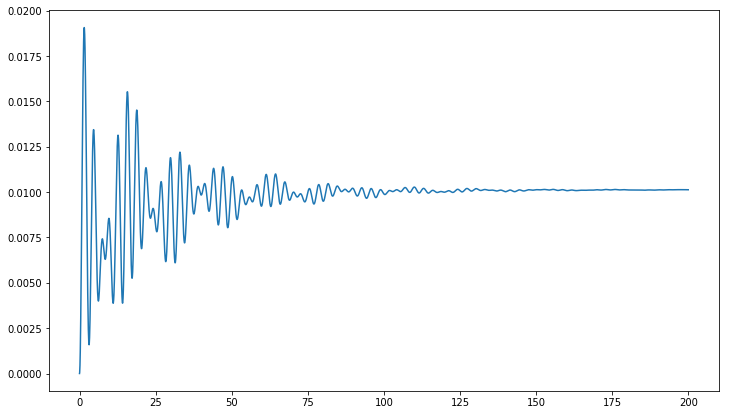

In [37]:

gamma = 0.05
w0=1.0


lam =0.2
Gamma = gamma/2.
Om = np.sqrt(w0**2 - Gamma**2)
factor=1./4.
ckAR= [factor*lam**2/(Om),factor*lam**2/(Om)]
#note:  the frequencies here are NEGATIVE from their nomral def
vkAR= [-(1.0j*Om - Gamma),-(-1.0j*Om - Gamma)]

ckAI =[-factor*lam**2*1.0j/(Om),factor*lam**2*1.0j/(Om)]
#ckAI =[factor*lam**2*1.0j/(Om),-factor*lam**2*1.0j/(Om)]

#vkAI = [-(-1.0j*(Om) - Gamma-1e-3),-(1.0j*(Om) - Gamma-1e-3)]
vkAI = [-(-1.0j*(Om) - Gamma),-(1.0j*(Om) - Gamma)]





NR=2
NI=2
# Q = sigmax()
Q = [sigmax(), sigmax(), sigmax(), sigmax()]
Del = 0.#np.pi/2.    
wq = 1.0     # Energy of the 2-level system.
Hsys = 0.5 * wq * sigmaz() + 0.5 * Del * sigmax()
# Hsys = 1

#tlist = np.linspace(0, 7.777777777777778, 36)
tlist = np.linspace(0, 200, 4000)
    
#for amirs Omega= pi data, tlist is different (actually a bit weird)
#tlist=tlistA
initial_state = basis(2,1) * basis(2,1).dag()                # Initial state of the system.


#return_vals = [tensor(qeye(N), kk) for kk in [Q]]            # List for which to calculate expectation value
return_vals = [initial_state, basis(2,0) * basis(2,1).dag()   ]            # List for which to calculate expectation value
eigen_sparse = False
calc_time = True                                             
options = Options(nsteps=15000, store_states=True,rtol=1e-12, atol=1e-12)        # Options for the solver.


#Convergence parameters
#we need very high Nc to get convergence.  might be interesting to understand why
Nc = input("nc: ")
Nc = int(Nc)

# results1Nc7 = a.hsolve(Hsys, Q,ckAR,ckAI,vkAR,vkAI, Nc, NR,NI, tlist, initial_state, options=options,\
    # progress_bar1=TextProgressBar(),progress_bar2=TextProgressBar())

# print("here")
# note that this expects the cks and vks as lists and not numpy arrays
# Hsys = liouvillian(Hsys)
def func(x):
    return 0.0*cos(x)
#Hsys = [Hsys, [sigmax(), func]]
#Hsys = Hsys
#L = liouvillian(Hsys,[])
A = BosonicHEOMSolver(Hsys, Q,ckAR,ckAI,vkAR,vkAI, Nc, options=options)
print("starting solve")
B, blerg= A.run(initial_state, tlist)

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.plot(tlist,expect(B.states,1-initial_state*initial_state.dag()))



In [ ]:
def pure_dephasing_evolution_analytical(tlist, wq, ck, vk):
    """
    Computes the propagating function appearing in the pure dephasing model.
        
    Parameters
    ----------
    t: float
        A float specifying the time at which to calculate the integral.
    
    wq: float
        The qubit frequency in the Hamiltonian.

    ck: ndarray
        The list of coefficients in the correlation function.
        
    vk: ndarray
        The list of frequencies in the correlation function.
    
    Returns
    -------
    integral: float
        The value of the integral function at time t.
    """
    evolution = np.array([np.exp(-1j*wq*t - correlation_integral(t, ck, vk)) for t in tlist])
    return evolution

def correlation_integral(t, ck, vk):
    """
    Computes the integral sum function appearing in the pure dephasing model.
    
    If the correlation function is a sum of exponentials then this sum
    is given by:
    
    .. math:
        
        \int_0^{t}d\tau D(\tau) = \sum_k\frac{c_k}{\mu_k^2}e^{\mu_k t}
        + \frac{\bar c_k}{\bar \mu_k^2}e^{\bar \mu_k t}
        - \frac{\bar \mu_k c_k + \mu_k \bar c_k}{\mu_k \bar \mu_k} t
        + \frac{\bar \mu_k^2 c_k + \mu_k^2 \bar c_k}{\mu_k^2 \bar \mu_k^2}
        
    Parameters
    ----------
    t: float
        A float specifying the time at which to calculate the integral.
    
    ck: ndarray
        The list of coefficients in the correlation function.
        
    vk: ndarray
        The list of frequencies in the correlation function.
    
    Returns
    -------
    integral: float
        The value of the integral function at time t.
    """
    t1 = np.sum(np.multiply(np.divide(ck, vk**2), np.exp(vk*t) - 1))
    
    t2 = np.sum(np.multiply(np.divide(np.conjugate(ck), np.conjugate(vk)**2),
                            np.exp(np.conjugate(vk)*t) - 1))
    t3 = np.sum((np.divide(ck, vk) + np.divide(np.conjugate(ck), np.conjugate(vk)))*t)

    return 2*(t1+t2-t3)

In [ ]:
tlist2 = tlist

from scipy.optimize import curve_fit
def wrapper_fit_func(x, N, *args):
    a, b, c, d = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N]), list(args[0][3*N:4*N])
    # print("debug")
    return fit_func(x, a, b, c, d, N)

# actual fitting function
def fit_func(x, a, b, c, d, N):
    tot = 0
    for i in range(N):
        # print(i)
        tot += a[i]*np.exp(b[i]*x)*np.cos(c[i]*x + d[i])
    return tot


def fitterR(ans, tlist, k):
    # the actual computing of fit
    popt = []
    pcov = [] 
    # tries to fit for k exponents
    for i in range(k):
        #params_0 = [0]*(2*(i+1))
        params_0 = [0.]*(4*(i+1))
        upper_a = abs(max(ans, key = abs))
        #sets initial guess
        guess = []
        #aguess = [ans[0]]*(i+1)#[max(ans)]*(i+1)
        aguess = [abs(max(ans, key = abs))]*(i+1)
        bguess = [-10]*(i+1)
        cguess = [4]*(i+1)
        dguess = [0]*(i+1)
        guess.extend(aguess)
        guess.extend(bguess)
        guess.extend(cguess) #c 
        guess.extend(dguess) #d
        # sets bounds
        # a's = anything , b's negative
        # sets lower bound
        b_lower = []
        alower = [-upper_a]*(i+1)
        blower = [-np.inf]*(i+1)
        clower = [0]*(i+1)
        dlower = [0]*(i+1)
        b_lower.extend(alower)
        b_lower.extend(blower)
        b_lower.extend(clower)
        b_lower.extend(dlower)
        # sets higher bound
        b_higher = []
        ahigher = [upper_a]*(i+1)
        bhigher = [np.inf]*(i+1)
        chigher = [np.inf]*(i+1)
        dhigher = [2*pi]*(i+1)
        b_higher.extend(ahigher)
        b_higher.extend(bhigher)
        b_higher.extend(chigher)
        b_higher.extend(dhigher)
        param_bounds = (b_lower, b_higher)
        
        p1, p2 = curve_fit(lambda x, *params_0: wrapper_fit_func(x, i+1, \
            params_0), tlist, ans, p0=guess, bounds = param_bounds)
        popt.append(p1)
        pcov.append(p2)
        print(i+1)
    return popt
# print(popt)

# function that evaluates values with fitted params at
# given inputs
def checker(tlist, vals, N):
    y = []
    for i in tlist:
        # print(i)
        
        y.append(wrapper_fit_func(i, N, vals))
    return y

k = 2
popt1 = fitterR(corrRana, tlist2, k)
for i in range(k):
    y = checker(tlist2, popt1[i],i+1)
    plt.plot(tlist2, corrRana, tlist2, y)
    
    plt.show()
    


y = checker(tlist3, popt1[k-1],k)
plt.plot(tlist3, real(ctlong), tlist3, y)

plt.show()
    

def fit_func2(x, a, b, c, d, N):
    tot = 0
    for i in range(N):
        # print(i)
        tot += a[i]*np.exp(b[i]*x)*np.cos(c[i]*x + d[i])
    cost = 0.
    for i in range(N):
        # print(i)
        cost += a[i]*np.cos(d[i])
        
        
    tot+=0.01*cost
    
    return tot      
# actual fitting function
def wrapper_fit_func2(x, N, *args):
    a, b, c, d = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N]), list(args[0][3*N:4*N])
    # print("debug")
    return fit_func2(x, a, b, c, d, N)

  
    
def fitterI(ans, tlist, k):
    # the actual computing of fit
    popt = []
    pcov = [] 
    # tries to fit for k exponents
    for i in range(k):
        #params_0 = [0]*(2*(i+1))
        params_0 = [0.]*(4*(i+1))
        upper_a = abs(max(ans, key = abs))*10
        #sets initial guess
        guess = []
        #aguess = [ans[0]]*(i+1)#[max(ans)]*(i+1)
        aguess = [abs(max(ans, key = abs))]*(i+1)
        bguess = [0]*(i+1)
        cguess = [0]*(i+1)
        dguess = [pi]*(i+1)
        guess.extend(aguess)
        guess.extend(bguess)
        guess.extend(cguess) #c 
        guess.extend(dguess) #d
        # sets bounds
        # a's = anything , b's negative
        # sets lower bound
        b_lower = []
        alower = [-upper_a]*(i+1)
        blower = [-np.inf]*(i+1)
        clower = [0]*(i+1)
        dlower = [0]*(i+1)
        b_lower.extend(alower)
        b_lower.extend(blower)
        b_lower.extend(clower)
        b_lower.extend(dlower)
        # sets higher bound
        b_higher = []
        ahigher = [upper_a]*(i+1)
        bhigher = [0.01]*(i+1)        
        chigher = [np.inf]*(i+1)
        dhigher = [2*pi]*(i+1)
        b_higher.extend(ahigher)
        b_higher.extend(bhigher)
        b_higher.extend(chigher)
        b_higher.extend(dhigher)
        param_bounds = (b_lower, b_higher)
        
        p1, p2 = curve_fit(lambda x, *params_0: wrapper_fit_func2(x, i+1, \
            params_0), tlist, ans, p0=guess, bounds = param_bounds)
        popt.append(p1)
        pcov.append(p2)
        print(i+1)
    return popt
# print(popt)

k1 = 2
popt2 = fitterI(corrIana, tlist2, k1)
for i in range(k1):
    y = checker(tlist2, popt2[i], i+1)
    plt.plot(tlist2, corrIana, tlist2, y)
    plt.show()  
    
#tlist3 = linspace(0,1,1000)

y = checker(tlist3, popt2[k-1],k)
plt.plot(tlist3, imag(ctlong), tlist3, y)

plt.show()